# ДИПЛОМНАЯ РАБОТА

# Тема 



# «Формирование клиентской базы с помощью прогностической модели машинного обучения по косвенным признакам»

## Содержание

In [152]:
# Введение
# 1.	Определение дипломной работы, цели, задачи.
# 2.	Реализуемый продукт
# 3.	Получение данных 
# 4.	Обработка данных
# 4.1.	Установка пакетов и библиотек
# 4.2.	Загрузка данных
# 4.3.	Разведочный анализ данных (EDA) 
# 4.4.	Визуализация данных 
# 4.5.	Предобработка  признаков 
# 4.5.1.	'HoldingYear' 
# 4.5.2.	'Rooms' 
# 4.5.3.	' OperatingSquare 
# 4.5.4.	'Square' и 'WorkingSquare'
# 4.5.5.	'HoldingActivity' и 'Activity'
# 4.5.6.	Измение типа признаков  
# 4.6.	Визуализация скорректированных данных 
# 4.7.	Формирование класса подготовки данных
# 4.8.	Построение новых признаков 
# 4.8.1.	"DistrictSize", "IsDistrictLarge" 
# 4.8.2.	"MedPriceDistrict" 
# 4.8.3.	"MedSalesByActivityYear", 'Activity_cat', 'Year_cat'
# 4.9.	Создание класса новых признаков 
# 4.10.	Создание модели 
# 4.10.1.	Проверка модели без генерации новых фич
# 4.10.2.	Проверка модели с генерацией новых фич
# 4.11.	Оценка качества
# 4.11.1.	Прогнозирование на тестовом датасете
# 4.11.2.	Оценка точности прогнозов 
# 5.	Внедрение модели. Формирование списка клиентов
# 6.	Заключение

# Обработка данных

##  Установка пакетов и библиотек 

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Настройка отображения графиков
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Разбиения выборки на тренировочнию и тестовую
from sklearn.model_selection import train_test_split

# Блокировка warnings
import warnings
warnings.filterwarnings('ignore')

# Вывод float
pd.set_option('display.float_format', '{:.2f}'.format)

# Вычисления Z-score
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize

# Дата и время
from datetime import datetime

# Случайные числа
import random as rnd

# Алгоритм машинного обучения 'Метод случайного леса'
from sklearn.ensemble import RandomForestRegressor

# Кросс-валидация 
from sklearn.model_selection import cross_validate

# Разбиение
from sklearn.model_selection import KFold

# Метрика r2
from sklearn.metrics import r2_score

## Загрузка данных

In [3]:
# Загрузка данных

In [4]:
TRAIN_DATA = './SKAN_train.csv'
TEST_DATA = './SKAN_test.csv'
TEST_DATA_SALES = './SKAN_test_sales.csv'

# Тренировочные данные
train_data = pd.read_csv(TRAIN_DATA, engine='python', on_bad_lines='skip')
train_data.drop('Unnamed: 0', axis=1, inplace=True)
train_data.head()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
0  14045              147973.54          35         7             9.00   
1  15060              240007.56          41         7             9.00   
2   4772              176740.73          53         8            12.00   
3   5816              140492.98          58         8            17.00   
4  10790              120181.23          99        11            12.00   

   HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare  ...  PromAct  \
0         1991   2.00   47.98          29.44             6.00  ...        B   
1         1991   3.00   65.68          40.05             8.00  ...        B   
2         1991   2.00   44.95          29.20             0.00  ...        B   
3         1991   2.00   53.35          52.73             9.00  ...        B   
4         1991   1.00   39.65          23.78             7.00  ...        B   

  Ecology_1  Ecology_2 Ecology_3 Social_1  Social_2  Social_3  Healthcare_1  \
0      0.09          B         B       33      7976         5           NaN   
1      0.00          B         B       46     10309         1           NaN   
2      0.05          B         B       34      7759         0           NaN   
3      0.44          B         B       23      5735         3           NaN   
4      0.01          B         B       35      5776         1           NaN   

   Helthcare_2  Shops_1  
0            0       11  
1            1       16  
2            1        3  
3            0        5  
4            2        4  

[5 rows x 21 columns]

In [5]:
# Id - идентификационный номер клиники;
# DiagnosticSalesVolume - объем реализаций клиникой услуг диагностики.
# DistrictId - идентификационный номер района расположения клиники;
# Activity - количество направлений деятельности клиники; 
# HoldingActivity - количество направлений деятельности в группе клиник;  
# HoldingYear - год регистрации группы клиник; 
# Rooms - количество врачебных помещений в клинике; 
# Square - общая площадь клиники;
# WorkingSquare - площадь врачебных помещений; 
# OperatingSquare - площадь операционного помещения;
# Мarketing_1, Мarketing_2 - показатели местности связанные с наличием потребителей и конкурентных производителей;
# PromAct - показатель проведения акций продвижения услуги;
# Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности;
# Social_1, Social_2, Social_3 - социальные показатели местности;
# Healtcare_1, Heltcare_2 - показатели местности, связанные с охраной здоровья;
# Shops_1, Shops_2 - показатели местности связанные с наличием магазинов, торговых центров;

In [6]:
# Размерность тренировочных данных
train_data.shape

(10000, 21)

In [7]:
# Тестовые данные
test_data = pd.read_csv(TEST_DATA, engine='python', on_bad_lines='skip')
test_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.head()

Id  DistrictId  Activity  HoldingActivity  HoldingYear  Rooms  Square  \
0    732          58         6            14.00         1972   2.00   49.88   
1  15863          74         6             1.00         1977   2.00   69.26   
2   5487         190         2             5.00         1909   1.00   13.60   
3  15671          47         2            22.00         2007   2.00   73.05   
4  14282          27        17            17.00         2017   1.00   47.53   

   WorkingSquare  OperatingSquare  Мarketing_1 PromAct  Ecology_1 Ecology_2  \
0          33.43             6.00          NaN       B       0.31         B   
1            NaN             1.00          NaN       B       0.08         B   
2          15.95            12.00      4702.00       B       0.00         B   
3          51.94             9.00          NaN       B       0.10         B   
4          43.39             1.00          NaN       A       0.07         B   

  Ecology_3  Social_1  Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  
0         B        11      2748         1           NaN            0        0  
1         B         6      1437         3           NaN            0        2  
2         B        30      7538        87           NaN            5        5  
3         B        23      4583         3           NaN            3        3  
4         B         2       629         1           NaN            0        0

In [8]:
# Размерность тестовых данных
test_data.shape

(5000, 20)

## Разведочный анализ данных (EDA) 

In [9]:
# Типы данных
train_data.dtypes

Id                         int64
DiagnosticSalesVolume    float64
DistrictId                 int64
Activity                   int64
HoldingActivity          float64
HoldingYear                int64
Rooms                    float64
Square                   float64
WorkingSquare            float64
OperatingSquare          float64
Мarketing_1              float64
PromAct                   object
Ecology_1                float64
Ecology_2                 object
Ecology_3                 object
Social_1                   int64
Social_2                   int64
Social_3                   int64
Healthcare_1             float64
Helthcare_2                int64
Shops_1                    int64
dtype: object

In [10]:
# Количество пропусков данных
pd.set_option('display.max_rows', None)
train_data.isnull().sum(axis=0)

Id                           0
DiagnosticSalesVolume        0
DistrictId                   0
Activity                     0
HoldingActivity              0
HoldingYear                  0
Rooms                        0
Square                       0
WorkingSquare             2113
OperatingSquare              0
Мarketing_1               4798
PromAct                      0
Ecology_1                    0
Ecology_2                    0
Ecology_3                    0
Social_1                     0
Social_2                     0
Social_3                     0
Healthcare_1             10000
Helthcare_2                  0
Shops_1                      0
dtype: int64

In [11]:
# Удаление неинформативных
train_data.drop('Healthcare_1', axis=1, inplace=True)
train_data.drop('Мarketing_1', axis=1, inplace=True)

In [12]:
train_data.describe()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
count 10000.00               10000.00    10000.00  10000.00         10000.00   
mean   8390.41              171311.09       50.40      8.01            12.17   
std    4859.02               74297.84       43.59      4.71             5.86   
min       7.00               47339.82        0.00      1.00             0.00   
25%    4176.50              123098.11       20.00      4.00             9.00   
50%    8401.50              153815.72       36.00      7.00            13.00   
75%   12599.50              199308.37       75.00     11.00            17.00   
max   16805.00              506586.77      209.00     22.00            20.00   

       HoldingYear    Rooms   Square  WorkingSquare  OperatingSquare  \
count     10000.00 10000.00 10000.00        7887.00         10000.00   
mean       4001.96     1.89    56.32          37.20             6.27   
std      200500.14     0.84    21.06          86.24            28.56   
min        1991.00     0.00     1.14           0.37             0.00   
25%        1991.00     1.00    41.77          22.77             1.00   
50%        1991.00     2.00    52.51          32.78             6.00   
75%        2001.00     2.00    65.90          45.13             9.00   
max    20052011.00    19.00   641.07        7480.59          2014.00   

       Ecology_1  Social_1  Social_2  Social_3  Helthcare_2  Shops_1  
count   10000.00  10000.00  10000.00  10000.00     10000.00 10000.00  
mean        0.12     24.69   5352.16      8.04         1.32     4.23  
std         0.12     17.53   4006.80     23.83         1.49     4.81  
min         0.00      0.00    168.00      0.00         0.00     0.00  
25%         0.02      6.00   1564.00      0.00         0.00     1.00  
50%         0.08     25.00   5285.00      2.00         1.00     3.00  
75%         0.20     36.00   7227.00      5.00         2.00     6.00  
max         0.52     74.00  19083.00    141.00         6.00    23.00

## Визуализация данных

In [13]:
def numeric_and_string_attributes(df):
    
#     Функция разделяет числовые и строковые признаки.

#     :param df: исследуемый датафрейм,
#     :return: num_cols - список числовых признаков,
#     str_cols - список строковых признаков.

    # Числовые признаки
    num_cols = []
    # Строковые признаки
    str_cols = []
    
    cols_and_type = df.dtypes.to_dict()
    
    for col in cols_and_type:
        if cols_and_type[col] in ('int64', 'float64'):
            num_cols.append(col)
        else: 
            str_cols.append(col)

    return num_cols, str_cols

In [14]:
# Числовые признаки 
num_cols, str_cols = numeric_and_string_attributes(train_data)
num_cols

['Id',
 'DiagnosticSalesVolume',
 'DistrictId',
 'Activity',
 'HoldingActivity',
 'HoldingYear',
 'Rooms',
 'Square',
 'WorkingSquare',
 'OperatingSquare',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1']

In [15]:
# Строковые признаки
str_cols

['PromAct', 'Ecology_2', 'Ecology_3']

In [16]:
# Словарь признаков и их русское значение
translate_col = {
    'Id': 'идентификационный номер клиники',
    'DistrictId': 'идентификационный номер района',
    'Rooms': 'количество врачебных помещений',
    'Square': 'общая площадь клиники',
    'WorkingSquare': 'площадь врачебных помещений',
    'OperatingSquare': 'площадь операционного\манипуляционного помещения',
    'Activity': 'количество направлений деятельности \n клиники',
    'HoldingActivity': 'количество направлений деятельности \n в группе клиник',
    'HoldingYear': 'год регистрации группы компаний',
    'Ecology_1': 'экологические показатели \n местности 1',
    'Ecology_2': 'экологические показатели \n местности 2',
    'Ecology_3': 'экологические показатели \n местности 3',
    'Social_1': 'социальные показатели \n месности 1',
    'Social_2': 'социальные показатели \n месности 2',
    'Social_3': 'социальные показатели \n месности 3',
    'Helthcare_2': 'показатели местности,\n связанные с охраной здоровья 2',
    'Shops_1': 'показатели связанные с наличием\n магазинов, торговых центров 1',
    'PromAct' : 'показатели пром.активности',
    'DiagnosticSalesVolume': 'объем реализаций услуг \n диагностики'
}

In [17]:
# Визуализация распределения числовых признаков

In [18]:
def visualization_numerical_characteristics(X=train_data, translate_col=translate_col, dop_text=''):
    
#     Визуализация цифровых признаков (так сделал, чтобы код в одном месте находился).

#     :param X: датасет, который будем визуализировать,
#     :param translate_col: словарь перевода признаков на русский язык,
#     :param dop_text: дополнительный текст к заголовку добавляется.

    plt.figure(figsize=[11, 13])

    # Общий заголовок для всех графиков
    plt.suptitle('Распределение числовых признаков '  + dop_text, 
                  y=1.005, 
                  fontsize=12, 
                  fontweight='bold')

    for i, col in enumerate(num_cols):
        plt.subplot(6, 3, i+1)
        # Заголовок для графика
        plt.title(f'\n{col} \n({translate_col[col]})', fontsize=10)
        # Задаём размер шривта и угол поворота текста для осей X и Y
        plt.xticks(fontsize=8, rotation=0)
        plt.yticks(fontsize=8, rotation=0)
        # Делаем размер шрифта по Y=5, не уберая название оси
        plt.ylabel('', fontsize=5)
        # Отрисовываем гистограмму
        plt.hist(X[col])

    # Автоматически уместить все элементы на полотне    
    plt.tight_layout()

    # Вывести графики на экран
    plt.show()

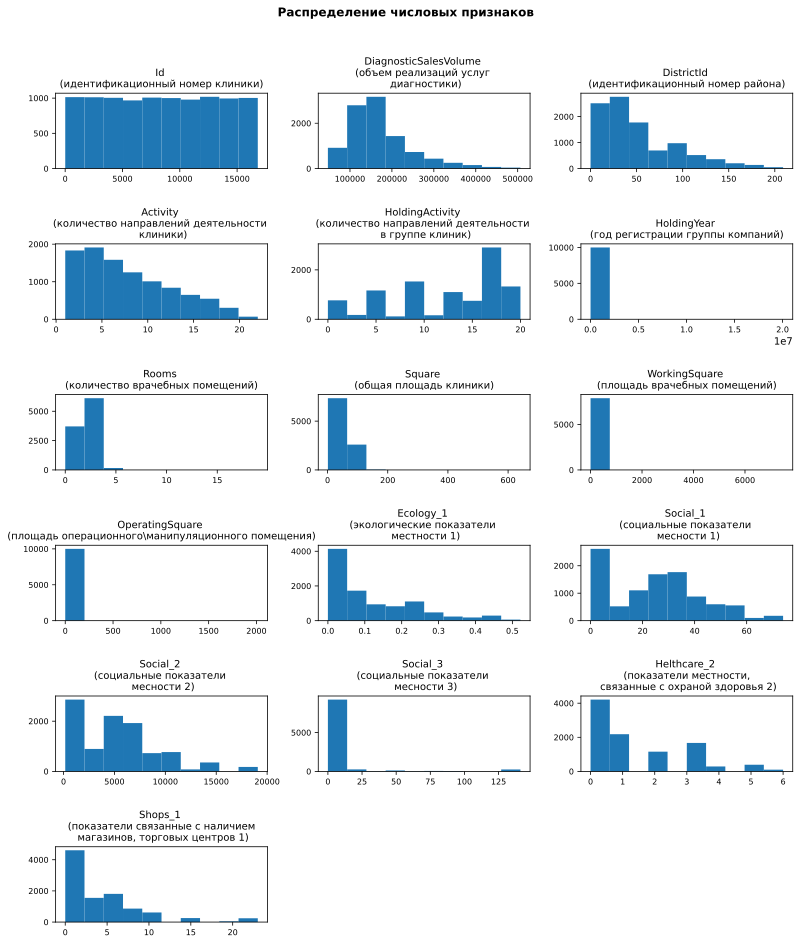

In [19]:
visualization_numerical_characteristics()

In [20]:
# Визуализация распределения строковых признаков

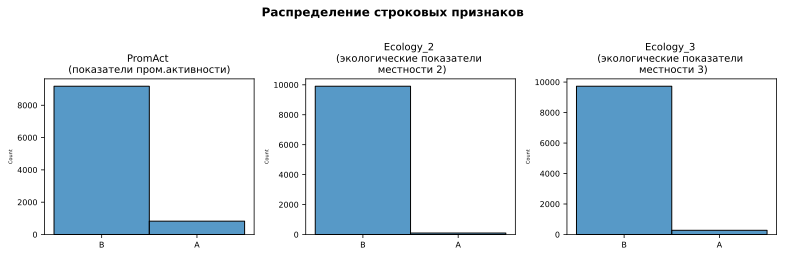

In [21]:
# Задаём размеры поля [ширина, длина]
plt.figure(figsize=[11, 6])

# Общий заголовок для всех графиков
plt.suptitle('Распределение строковых признаков', 
              y=1.005, 
              fontsize=12, 
              fontweight='bold')
index_plt = 1
# Добавляем графики на поле (3 шт. в одном ряду)
for col in str_cols:
    plt.subplot(2, 3, index_plt)
    # Заголовок для графика
    plt.title(f'{col} \n({translate_col[col]})', fontsize=10)
    # Задаём размер шривта и угол поворота текста для осей X и Y
    plt.xticks(fontsize=8, rotation=0)
    plt.yticks(fontsize=8, rotation=0)
    # Убираем подпись оси X
    plt.xlabel(' ')
    # Делаем размер шрифта по Y=5, не уберая название оси
    plt.ylabel('', fontsize=5)
    # Отрисовываем гистограмму
    sns.histplot(train_data[col])
    index_plt += 1

# Автоматически уместить все элементы на поле    
plt.tight_layout()

# Вывести графики на экран
plt.show()

## Предобработка признаков

In [22]:
# Выбросы признаков

In [23]:
def emission_test(ds, col_test, threshold_val=3):
    
#     Функция проводит тестирование столбцов на выбросы методом Z-score.
    
#     :param ds: исследуемый датасет,
#     :param col_test: список колонок,
#     :param threshold_val: пороговое значение Z-score,
#     :return: текстовый отчет и список выбросов.

    result = ''
    NUM = 2  # количество цифр после запятой
    outliers_list = [] # лист выбросов
    for col in col_test:
        # Вычисление Z-score
        z = np.abs(stats.zscore(ds[col]))
        # Установка порогового значения Z-score
        threshold = 3
        # Выявление выбросов на основе Z-score
        outliers = ds[col][z > threshold]
        
        if len(outliers) > 0:
            outliers_list.append(outliers)
            
            result += f'В столбце {col} ({translate_col[col]}),\n{len(outliers)} выбросов. Mean: {round(ds[col].mean(), NUM)}, ' \
            f'Min: {round(ds[col].min(), NUM)}, Max: {round(ds[col].max(), NUM)}, ' \
            f'Moda: {round(ds[col].mode()[0], NUM)}, Median: {round(ds[col].median(), NUM)} \n\n'
    
    return f'Выбросов нет. ' if result == '' else result, outliers_list

In [24]:
def viev_outliers(outliers_list, col_name):
    
#     Функция выводит строки датафрейма, в которых есть выбросы.
    
#     :param outliers_list: список выбросов,
#     :param col_name: название признака (фичи),
#     :return: индексы выбросов.

    for item in outliers:
        if item.name == col_name:
            return item.index 

In [25]:
# Признаки имеющие выбросы
text_outliers, outliers = emission_test(ds=train_data, col_test=num_cols)
print(text_outliers)

В столбце DiagnosticSalesVolume (объем реализаций услуг 
 диагностики),
175 выбросов. Mean: 171311.09, Min: 47339.82, Max: 506586.77, Moda: 47339.82, Median: 153815.72 

В столбце DistrictId (идентификационный номер района),
88 выбросов. Mean: 50.4, Min: 0, Max: 209, Moda: 27, Median: 36.0 

В столбце HoldingYear (год регистрации группы компаний),
1 выбросов. Mean: 4001.96, Min: 1991, Max: 20052011, Moda: 1991, Median: 1991.0 

В столбце Rooms (количество врачебных помещений),
22 выбросов. Mean: 1.89, Min: 0.0, Max: 19.0, Moda: 2.0, Median: 2.0 

В столбце Square (общая площадь клиники),
93 выбросов. Mean: 56.32, Min: 1.14, Max: 641.07, Moda: 1.14, Median: 52.51 

В столбце OperatingSquare (площадь операционного\манипуляционного помещения),
6 выбросов. Mean: 6.27, Min: 0.0, Max: 2014.0, Moda: 1.0, Median: 6.0 

В столбце Ecology_1 (экологические показатели 
 местности 1),
61 выбросов. Mean: 0.12, Min: 0.0, Max: 0.52, Moda: 0.01, Median: 0.08 

В столбце Social_2 (социальные показатели 

####  'HoldingYear' 

In [26]:
# Даты больше текущей даты 
train_data[train_data['HoldingYear'] > datetime.now().year]

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
1497  10821              203267.63         109         9            12.00   
4189  11614              194422.88         147         4             9.00   

      HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare PromAct  \
1497     20052011   1.00   37.27          20.24             9.00       B   
4189         4968   2.00   44.79          28.36             5.00       B   

      Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
1497       0.14         B         B        30      6141        10   
4189       0.32         B         B        25      4756        16   

      Helthcare_2  Shops_1  
1497            3        6  
4189            5        8

In [27]:
train_data['HoldingYear'].describe()

count      10000.00
mean        4001.96
std       200500.14
min         1991.00
25%         1991.00
50%         1991.00
75%         2001.00
max     20052011.00
Name: HoldingYear, dtype: float64

In [28]:
print(emission_test(ds=train_data, col_test=['HoldingYear'])[0])

В столбце HoldingYear (год регистрации группы компаний),
1 выбросов. Mean: 4001.96, Min: 1991, Max: 20052011, Moda: 1991, Median: 1991.0 




Коррекция

In [29]:
# Заменены года больше текущего года на моду
train_data.loc[train_data['HoldingYear'] > datetime.now().year, ['HoldingYear']] = train_data['HoldingYear'].mode()[0]

In [30]:
train_data['HoldingYear'].describe()

count   10000.00
mean     1996.66
std         9.48
min      1991.00
25%      1991.00
50%      1991.00
75%      2001.00
max      2020.00
Name: HoldingYear, dtype: float64

In [31]:
# Выбросы
print(emission_test(ds=train_data, col_test=['HoldingYear'])[0])

Выбросов нет. 


#### 'Rooms'

In [32]:
train_data.loc[viev_outliers(outliers, 'Rooms')].sort_values(by='Rooms')

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
4762   4077              399864.75          21         6             5.00   
8925   4221              369342.99         105         4            12.00   
8726    245              231747.15          88         1             9.00   
8659  14150              347819.49          13        13            17.00   
8511   4256              276532.17          23         1             2.00   
6988   8692              217535.89          62         5             3.00   
6623   3301              410591.60         167         6             6.00   
5466   3461              377467.03           8         4            17.00   
5361   2886              396821.34          78        15            16.00   
9432    345              281735.16          46         6             0.00   
9699   4978              486939.30         169        12            14.00   
4431   7601              164919.08          53         5             1.00   
3271   6365               90154.91          27         5            12.00   
3268   8908              364357.12          34         5             1.00   
1982   5555              364211.91          86        12            20.00   
1503   1250              248244.06          86         3             5.00   
1422   4289              383620.12         195         7             7.00   
4487  13441              498311.06          13         2             6.00   
2170  14010              183729.57          99         7             9.00   
8849  14872              137863.42           9         3             2.00   
377    5934              253812.26          57         2            20.00   
1454   8498               62691.69           1        17            17.00   

      HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare PromAct  \
4762         1991   5.00  114.31          88.49             9.00       B   
8925         1991   5.00   85.31          56.69             5.00       B   
8726         1991   5.00   90.76          70.99             5.00       B   
8659         2001   5.00  119.01          69.03            11.00       B   
8511         2011   5.00  198.93         123.14            10.00       B   
6988         2017   5.00  124.93          81.12            30.00       A   
6623         1991   5.00  111.05          81.94             9.00       B   
5466         1999   5.00  112.14          79.80            10.00       B   
5361         1998   5.00  118.87          69.02            10.00       B   
9432         1991   5.00  147.71            NaN             0.00       B   
9699         2001   5.00  117.86          76.56             9.00       B   
4431         1991   5.00   39.91          39.39             1.00       B   
3271         1991   5.00   42.00            NaN             0.00       B   
3268         1991   5.00  121.58         114.91             1.00       B   
1982         2011   5.00  275.65         233.95            26.00       B   
1503         1991   5.00  108.06          82.72             8.00       B   
1422         1991   5.00   95.62          62.38             7.00       B   
4487         1997   5.00  183.38         100.99            15.00       B   
2170         1991   6.00   59.41          38.70             6.00       B   
8849         1994  10.00   60.87          38.42            10.00       B   
377          2002  10.00   59.06          36.22            10.00       B   
1454         2014  19.00   42.01          21.78             7.00       B   

      Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
4762       0.03         B         B        25      5487         3   
8925       0.04         B         B        25      3478        11   
8726       0.13         B         B        43      8429         3   
8659       0.09         B         B        74     19083         2   
8511       0.01         B         B         2       475         0   
6988       0.07         B         B         2       629         1   
6623 

In [33]:
# Количество клиник по количеству врачебных помещений
train_data['Rooms'].value_counts()

2.00     3880
1.00     3705
3.00     2235
4.00      150
5.00       18
0.00        8
10.00       2
19.00       1
6.00        1
Name: Rooms, dtype: int64

In [34]:
# Выбросы
print(emission_test(ds=train_data, col_test=['Rooms'])[0])

В столбце Rooms (количество врачебных помещений),
22 выбросов. Mean: 1.89, Min: 0.0, Max: 19.0, Moda: 2.0, Median: 2.0 




Коррекция

In [35]:
# Заменены на медиальное значения меньше 1 помещения или если на 100 кв.м. площади приходится более 5 помещений 
index_edit = train_data.query('(((Rooms >= 5) & (Square < 100)) | (Rooms < 1))').index
train_data.loc[index_edit, ['Rooms']] = train_data['Rooms'].median()

In [36]:
train_data['Rooms'].describe()

count   10000.00
mean        1.89
std         0.81
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         5.00
Name: Rooms, dtype: float64

In [37]:
# Выбросы
print(emission_test(ds=train_data, col_test=['Rooms'])[0])

В столбце Rooms (количество врачебных помещений),
13 выбросов. Mean: 1.89, Min: 1.0, Max: 5.0, Moda: 2.0, Median: 2.0 




####  'OperatingSquare' 

In [38]:
train_data.loc[viev_outliers(outliers, 'OperatingSquare')].sort_values(by='OperatingSquare')

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
2916  12397              356059.97          72         2            20.00   
2969   7448              252196.42          62         3             3.00   
4651  12559              236932.75          58         3             3.00   
9895   2744              187355.87          27         5            10.00   
8584  14686               84431.65          81         6             1.00   
1064  14663               86669.99          62         4             1.00   

      HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare PromAct  \
2916         2019   3.00   97.49          99.32            96.00       B   
2969         2015   3.00  114.73         112.59           112.00       A   
4651         2016   3.00  116.41         113.11           112.00       B   
9895         2015   3.00  123.43         125.81           123.00       B   
8584         1991   1.00   32.28          19.28          1970.00       B   
1064         2014   1.00   47.10          46.45          2014.00       A   

      Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
2916       0.21         B         B        11      2398         2   
2969       0.07         B         B         2       629         1   
4651       0.44         B         B        23      5735         3   
9895       0.02         B         B         2       469         0   
8584       0.01         B         B        30      5285         0   
1064       0.07         B         B         2       629         1   

      Helthcare_2  Shops_1  
2916            3        0  
2969            0        0  
4651            0        5  
9895            0        0  
8584            6        6  
1064            0        0

In [39]:
train_data['OperatingSquare'].describe()

count   10000.00
mean        6.27
std        28.56
min         0.00
25%         1.00
50%         6.00
75%         9.00
max      2014.00
Name: OperatingSquare, dtype: float64

In [40]:
# Выбросы
print(emission_test(ds=train_data, col_test=['OperatingSquare'])[0])

В столбце OperatingSquare (площадь операционного\манипуляционного помещения),
6 выбросов. Mean: 6.27, Min: 0.0, Max: 2014.0, Moda: 1.0, Median: 6.0 




In [41]:
# Все операционные помещения
train_data['OperatingSquare'].value_counts().sort_values()

123.00        1
84.00         1
75.00         1
21.00         1
54.00         1
62.00         1
40.00         1
29.00         1
1970.00       1
27.00         1
39.00         1
35.00         1
73.00         1
23.00         1
60.00         1
63.00         1
42.00         1
36.00         1
96.00         1
26.00         1
53.00         1
78.00         1
66.00         1
2014.00       1
48.00         1
31.00         1
72.00         1
25.00         2
58.00         2
43.00         2
112.00        2
30.00         2
51.00         2
41.00         2
32.00         2
37.00         2
22.00         3
2.00          4
18.00         6
19.00        11
17.00        12
20.00        14
16.00        16
3.00         22
15.00        31
4.00         39
14.00        51
13.00        67
11.00       233
12.00       249
7.00        609
0.00        697
9.00        843
6.00       1038
10.00      1075
5.00       1169
8.00       1306
1.00       2460
Name: OperatingSquare, dtype: int64

In [42]:
# Без операционной\манипуляционной
train_data.query('(OperatingSquare == 0)').sort_values(by='Square')

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
4853   3231              101277.55          27         1             0.00   
8030  13272              190173.35           1         6            17.00   
7767   6934               63930.61          21         2             5.00   
1891  13692               71097.40           0         7             5.00   
9516  14243               81916.63           0         2             5.00   
6054   6358               86703.91         111         4            15.00   
501   15930               91404.99          27         5             0.00   
900    8947              140319.71          34        18             0.00   
8444   2957               48734.85          23         5             4.00   
6969  16084               63497.96          27         7            19.00   
2008  15392               52486.46          23         3             6.00   
8305  16144               53455.09          23         4             3.00   
9476  13796               59361.72          23         3             4.00   
7850   8807               48402.07          23         5            12.00   
2541   7295               58522.24          23         2             9.00   
3190   1184               52303.97          23         2             0.00   
1363   7162              122125.21          33         4             8.00   
5699  15876               54930.41          30         7            12.00   
7754   3262              132831.90          33        14            17.00   
4708   4383               53855.38          23        14            17.00   
7324  10032              142655.24          33        14            12.00   
8957   9049               49780.02          23         3             4.00   
9027   6035              128006.57          33         5             9.00   
2223   9193              136674.25          33        10             8.00   
3014   9166               79870.55          27        10            20.00   
4953   7846               50899.46          23         4            12.00   
9249   6796              116884.73          25        16            20.00   
1008  10131              125636.73          33         4            10.00   
9407  15465              119410.61          33         4            12.00   
7579  13456              116265.16          33         5            12.00   
4742  15618               53506.62          23         5             4.00   
731    1641               59208.14          23         2             2.00   
7072  15006               50870.21          23         6             4.00   
6299   2842              103363.17          74         3             0.00   
9113  11681               90648.26          27        20            20.00   
713    4199               87292.38          27        11            20.00   
4213   6089              117057.69          33         2            12.00   
7787  14228               50941.58          23         2             0.00   
7077  10414               62010.33          27         7             0.00   
6856   2655               48662.61          23         4             0.00   
7855   7857              129988.83          33        14            16.00   
3764  10105              129569.80          33         6            17.00   
1660   8182               74284.33          23         5             4.00   
9908   3178              107503.30          62         5             0.00   
2516  12362               59152.48          23         4             0.00   
9410  10245              103401.95          62         1            20.00   
3495  12870               70899.17          27         2            12.00   
2911   8333               88972.45          27        16            20.00   
2419  12895               86432.76          62         4             4.00   
7720   5757               94930.56          62        20             0.00   
2586   8628               93255.14          23         8            17.00   
6523 

In [43]:
# С операционной > 36 стандартной
train_data.query('(OperatingSquare > 36)').sort_values(by='OperatingSquare')

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
1077   9697               74574.92          27        18            19.00   
5849  11631              158760.59          46        15            16.00   
9111   6715              160017.47          48         1            10.00   
5816   2278               93836.94          27        12            11.00   
4142  15473              155620.08          88        10            19.00   
4588    455              173505.81          48         2             1.00   
3431   7118              123157.42          27         5             3.00   
7480  10553               91127.28          62         4            17.00   
1867   3274              135623.12          58         2             2.00   
551    1322              117560.73           6         1             1.00   
5904    680              106618.91          27        10            17.00   
9889  12925               70520.01          23         3            17.00   
1860   4272              208900.54         161         7            17.00   
8232   7169              195376.50          34         6            20.00   
6036  12673              209386.78          34        14            20.00   
5162  11746              169751.17          27         8            17.00   
4110    306              143572.88          27        14            20.00   
5888  16600              148794.78          52        15            17.00   
4079   6515              154504.47          23         5            17.00   
1369   2378              151395.40          27         4             2.00   
227   16402              296118.90           2        12            16.00   
5149  13710              128390.43          42         9            10.00   
6240   4973              232283.59          96         9            12.00   
1455  12514              350966.97          54        10            15.00   
7088   6576               79263.97          27         4            17.00   
2916  12397              356059.97          72         2            20.00   
4651  12559              236932.75          58         3             3.00   
2969   7448              252196.42          62         3             3.00   
9895   2744              187355.87          27         5            10.00   
8584  14686               84431.65          81         6             1.00   
1064  14663               86669.99          62         4             1.00   

      HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare PromAct  \
1077         2019   1.00   40.08          37.83            37.00       B   
5849         1991   1.00   42.98          24.22            37.00       B   
9111         2010   1.00   42.07          22.49            39.00       B   
5816         2015   1.00   43.29          42.84            40.00       B   
4142         2016   1.00   42.36          44.78            41.00       B   
4588         1991   1.00   41.19           1.63            41.00       B   
3431         2016   2.00  139.07          89.79            42.00       B   
7480         2019   1.00   46.01          43.42            43.00       A   
1867         1991   3.00  138.98         138.00            43.00       B   
551          2013   1.00   48.13          45.02            48.00       B   
5904         2017   1.00   54.42          51.50            51.00       A   
9889         2017   2.00   51.44          53.13            51.00       B   
1860         1994   2.00   53.22          32.64            53.00       B   
8232         2016   2.00   56.74          57.51            54.00       B   
6036         1991   2.00   60.60           2.40            58.00       B   
5162         2016   2.00   61.07          59.85            58.00       A   
4110         2015   2.00   66.79          64.62            60.00       B   
5888         1991   2.00   64.86            NaN            62.00       B   
4079         2019   2.00   67.15          33.96            63.00       B   
1369         2014   2.00

In [44]:
# С операционной > 48 нормативной кардиологической
train_data.query('(OperatingSquare > 48)').sort_values(by='OperatingSquare')

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
5904    680              106618.91          27        10            17.00   
9889  12925               70520.01          23         3            17.00   
1860   4272              208900.54         161         7            17.00   
8232   7169              195376.50          34         6            20.00   
6036  12673              209386.78          34        14            20.00   
5162  11746              169751.17          27         8            17.00   
4110    306              143572.88          27        14            20.00   
5888  16600              148794.78          52        15            17.00   
4079   6515              154504.47          23         5            17.00   
1369   2378              151395.40          27         4             2.00   
227   16402              296118.90           2        12            16.00   
5149  13710              128390.43          42         9            10.00   
6240   4973              232283.59          96         9            12.00   
1455  12514              350966.97          54        10            15.00   
7088   6576               79263.97          27         4            17.00   
2916  12397              356059.97          72         2            20.00   
2969   7448              252196.42          62         3             3.00   
4651  12559              236932.75          58         3             3.00   
9895   2744              187355.87          27         5            10.00   
8584  14686               84431.65          81         6             1.00   
1064  14663               86669.99          62         4             1.00   

      HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare PromAct  \
5904         2017   1.00   54.42          51.50            51.00       A   
9889         2017   2.00   51.44          53.13            51.00       B   
1860         1994   2.00   53.22          32.64            53.00       B   
8232         2016   2.00   56.74          57.51            54.00       B   
6036         1991   2.00   60.60           2.40            58.00       B   
5162         2016   2.00   61.07          59.85            58.00       A   
4110         2015   2.00   66.79          64.62            60.00       B   
5888         1991   2.00   64.86            NaN            62.00       B   
4079         2019   2.00   67.15          33.96            63.00       B   
1369         2014   2.00   68.84          64.23            66.00       B   
227          1991   3.00   79.72          44.73            72.00       B   
5149         2006   1.00   38.07          19.72            73.00       B   
6240         1991   3.00   78.45          47.15            75.00       B   
1455         2014   2.00   79.81          79.58            78.00       B   
7088         2018   1.00   38.22          18.72            84.00       B   
2916         2019   3.00   97.49          99.32            96.00       B   
2969         2015   3.00  114.73         112.59           112.00       A   
4651         2016   3.00  116.41         113.11           112.00       B   
9895         2015   3.00  123.43         125.81           123.00       B   
8584         1991   1.00   32.28          19.28          1970.00       B   
1064         2014   1.00   47.10          46.45          2014.00       A   

      Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
5904       0.07         B         B         2       629         1   
9889       0.01         B         B         1       388         0   
1860       0.00         B         B        14      3369        24   
8232       0.07         B         B        53     13670         4   
6036       0.07         B         B        53     13670         4   
5162       0.07         B         B         2       629         1   
4110       0.02         B         B         2       469         0   
5888       0.37         B         B        34      7065         1   
4079       0.03     

In [45]:
# Квантили
train_data['OperatingSquare'].quantile(0.975), train_data['OperatingSquare'].quantile(0.025)

(13.0, 0.0)

In [46]:
# Медиана
train_data['OperatingSquare'].median()

6.0

Коррекция

In [47]:
# Маленькое помещение означает совмещенность манипуляционной с врачебным помещением
# Заменим все операционные\манипуляционные помещения, которые больше 48 на нормативное
train_data.loc[train_data['OperatingSquare'] > 48, ['OperatingSquare']] = 48

In [48]:
train_data['OperatingSquare'].describe()

count   10000.00
mean        5.84
std         4.57
min         0.00
25%         1.00
50%         6.00
75%         9.00
max        48.00
Name: OperatingSquare, dtype: float64

In [49]:
# Выбросы
print(emission_test(ds=train_data, col_test=['OperatingSquare'])[0])

В столбце OperatingSquare (площадь операционного\манипуляционного помещения),
62 выбросов. Mean: 5.84, Min: 0.0, Max: 48.0, Moda: 1.0, Median: 6.0 




####  'Square' и 'WorkingSquare' 

In [50]:
train_data.loc[viev_outliers(outliers, 'Square')].sort_values(by='Square')

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
1726   5291              177099.25          27         8            12.00   
727   13697              332950.96          76         6            14.00   
8944   3634              220515.77          27         8             1.00   
4979  14980              429336.54         125         7            10.00   
5416  10565              468084.18         169        14            17.00   
5743    105              496802.33          54         7             1.00   
1603   4779              186536.98         168         3             2.00   
3268   8908              364357.12          34         5             1.00   
5425   3384              443847.53          85         4            17.00   
6230   2936              179846.80          30         1             2.00   
358    6013              155078.11          62         3             3.00   
9392  16292              375926.32         123         7            10.00   
2194  11606              218645.80          23         2             2.00   
7829  11398              207992.91          62         3             3.00   
3988  10352              350184.05           1         7             0.00   
9813   2047              179920.72          62         2             3.00   
4839   1518              321787.47          20        16            20.00   
2520   5925              278189.58           9        19            18.00   
5441  11808              162540.98           4         6            18.00   
9895   2744              187355.87          27         5            10.00   
4738   8025              207551.55           3        15            15.00   
1916   3199              421344.73          38        20            20.00   
3444   7623              476102.56          48         7             1.00   
461   16545              398058.71          17        18            20.00   
5237   6312              349043.49           1        14             1.00   
6988   8692              217535.89          62         5             3.00   
5690   6724              248935.50           1         1            17.00   
8143  15258              502020.06          17         4             0.00   
1537   3213              500656.03          54         4             1.00   
343     723              417757.63         113         6            20.00   
9308  10329              131876.63          27         4             5.00   
1335  10618              234730.40          29         7            20.00   
3974   6509              360565.24          20         2            20.00   
7728   7460              143517.22          24         2            20.00   
7670  11607              220579.24          62         4             1.00   
9828  13637              489000.73          24         3             1.00   
5753   3773              226301.87          62         9             0.00   
86     9620              408560.36         148        16             1.00   
1918  13610              475652.24          63         8            17.00   
3318   2377              404939.99          17        17            20.00   
6910   1177              105741.40         140         1            20.00   
426    3449              458761.32         123         4            15.00   
8111  12508              120676.44          23         9            20.00   
8911   8170              324329.67         191        19            20.00   
7164  12621              157841.79           4         7            18.00   
7344   4334              133876.58          93         1             1.00   
496    8165              145469.64          74         4             3.00   
7930   9105              133815.65          30         2             4.00   
3183    549              133350.19          23         2             0.00   
8214   5232              135405.91          93         2             0.00   
7903   9209              157230.71          93         1             1.00   
8182 

In [51]:
# Общая площадь клиники
len(train_data['Square'].unique())

10000

In [52]:
train_data['Square'].value_counts().sort_values()

47.98     1
57.97     1
44.95     1
53.35     1
39.65     1
80.38     1
62.25     1
80.31     1
64.51     1
46.46     1
46.30     1
68.81     1
54.52     1
68.10     1
53.77     1
73.61     1
44.51     1
110.96    1
103.61    1
41.12     1
42.53     1
64.71     1
41.67     1
118.91    1
62.18     1
82.67     1
106.96    1
49.36     1
64.56     1
77.87     1
39.44     1
41.77     1
63.68     1
34.77     1
42.18     1
85.28     1
48.37     1
47.58     1
43.70     1
47.91     1
54.48     1
58.42     1
56.49     1
58.69     1
104.21    1
48.85     1
49.93     1
41.54     1
47.08     1
41.27     1
35.39     1
35.28     1
61.40     1
31.89     1
42.41     1
56.22     1
38.01     1
57.32     1
50.30     1
45.96     1
47.32     1
65.02     1
54.79     1
42.51     1
64.14     1
41.19     1
60.50     1
57.96     1
45.26     1
64.93     1
79.23     1
84.69     1
52.46     1
39.43     1
63.18     1
42.68     1
60.50     1
65.56     1
45.92     1
61.33     1
49.89     1
62.78     1
58.43     1
61.7

In [53]:
# Площадь врачебных помещений
train_data['WorkingSquare'].value_counts().sort_values()

29.44      1
23.78      1
46.68      1
37.16      1
18.92      1
27.92      1
45.74      1
31.76      1
39.31      1
52.41      1
53.89      1
31.99      1
32.01      1
52.73      1
23.11      1
47.80      1
20.21      1
44.17      1
0.64       1
43.97      1
31.01      1
23.38      1
19.34      1
37.28      1
18.21      1
28.09      1
42.78      1
57.00      1
29.20      1
58.45      1
26.35      1
54.72      1
106.34     1
33.53      1
23.29      1
46.81      1
20.46      1
21.68      1
23.35      1
65.22      1
20.95      1
38.70      1
32.61      1
31.15      1
31.79      1
31.10      1
33.51      1
32.27      1
29.14      1
23.92      1
63.30      1
81.91      1
52.42      1
18.52      1
61.14      1
24.35      1
23.28      1
48.99      1
47.70      1
21.59      1
19.39      1
19.49      1
35.22      1
31.09      1
33.04      1
22.92      1
33.32      1
30.74      1
28.84      1
34.02      1
32.46      1
31.92      1
37.43      1
20.98      1
46.24      1
4.09       1
34.74      1

In [54]:
# Площадь < 20 м
train_data.query('(Square < 20)').sort_values(by='Square')

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
6392  14793              145147.86           1         3             1.00   
8283  15751              366703.02          34         1             4.00   
4853   3231              101277.55          27         1             0.00   
1608  10209              110078.08           6         3            20.00   
9294   6789              350404.15          45         3             1.00   
3280  10534               78048.58          27        10            17.00   
4900   4511              129103.25          27         8            19.00   
9613   7664              386626.79          38         8             1.00   
1316  11533               86083.42          27        18             1.00   
8030  13272              190173.35           1         6            17.00   
3413   9494              295577.92           5         1             1.00   
212    1755              330008.87          88         4            20.00   
4739  12683               62711.04          81         4             5.00   
7767   6934               63930.61          21         2             5.00   
5617  15884               62268.15          57         5             5.00   
3166  15134               59377.69         150         7            12.00   
6945  12934              144600.38          62         4            20.00   
1891  13692               71097.40           0         7             5.00   
3794    530               92676.69         101         5             5.00   
7897  10642               89928.98          21         1             5.00   
9516  14243               81916.63           0         2             5.00   

      HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare PromAct  \
6392         1991   1.00    1.14           4.53             1.00       B   
8283         1991   1.00    1.99           2.64             1.00       B   
4853         1991   2.00    2.38           0.87             0.00       B   
1608         2014   1.00    2.60           4.60             1.00       B   
9294         1991   1.00    2.95           5.26             1.00       B   
3280         2013   1.00    4.38          40.81             1.00       B   
4900         2016   3.00    4.39           5.61             1.00       B   
9613         1991   1.00    4.50           4.62             1.00       B   
1316         1991   1.00    4.63           1.97             1.00       B   
8030         1991   3.00    4.82          79.77             0.00       B   
3413         1991   1.00    5.13           5.55             1.00       B   
212          1991   2.00    5.50          67.63             1.00       B   
4739         1991   3.00   13.78          15.99             7.00       B   
7767         1991   1.00   16.12           8.82             0.00       B   
5617         1991   3.00   16.55          16.70             8.00       A   
3166         1991   1.00   17.05          20.04             8.00       B   
6945         1991   2.00   17.41            NaN             1.00       A   
1891         1991   1.00   17.50          13.45             0.00       B   
3794         1991   1.00   18.51          15.17             3.00       B   
7897         1991   1.00   18.98          11.42             2.00       B   
9516         1991   1.00   19.93          15.54             0.00       B   

      Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
6392       0.01         B         B         1       264         0   
8283       0.07         B         B        53     13670         4   
4853       0.02         B         B         2       469         0   
1608       0.24         B         B         5      1564         0   
9294       0.20         B         B        23      5212         6   
3280       0.21         B         B         9      1892         0   
4900       0.21         B         B         9      1892         0   
9613       0.06         B         B        15      2787         2   
1316       0.01     

In [55]:
# Клиники с общей площадью меньше площади врачебных помещений 
train_data.query('(Square < WorkingSquare)').sort_values(by='Square')

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
6392  14793              145147.86           1         3             1.00   
8283  15751              366703.02          34         1             4.00   
1608  10209              110078.08           6         3            20.00   
9294   6789              350404.15          45         3             1.00   
3280  10534               78048.58          27        10            17.00   
4900   4511              129103.25          27         8            19.00   
9613   7664              386626.79          38         8             1.00   
8030  13272              190173.35           1         6            17.00   
3413   9494              295577.92           5         1             1.00   
212    1755              330008.87          88         4            20.00   
4739  12683               62711.04          81         4             5.00   
5617  15884               62268.15          57         5             5.00   
3166  15134               59377.69         150         7            12.00   
2787   1243               64460.51          30         6             1.00   
1675   3545               60556.66          23         9            17.00   
6387   1584               58536.78          23         4            12.00   
6041  13882              159398.49          20         6            10.00   
9476  13796               59361.72          23         3             4.00   
178    2423              119193.01          57         7             5.00   
2088  11705               53575.28          23        12            17.00   
3776  12370               58995.78          23         1             4.00   
2763   9954               54318.63          23        12             0.00   
2541   7295               58522.24          23         2             9.00   
1344  14012              116349.13          25        17             1.00   
5966  11000               53304.59          23         5            17.00   
4846   6202               78567.27          27         8            20.00   
2247  16779              138882.17         109         2             9.00   
7035   8722              116624.15          25        15            13.00   
6332   8968               83912.86          27         3             5.00   
4159   2775              112972.40          27         3             1.00   
3503   9486              120338.73          25         4             1.00   
5528   3005              139613.62          31         6             9.00   
6128  10303               90224.38          58        12            18.00   
784    9088               88582.87          27        14            17.00   
2260  15226               70245.57          23         4             3.00   
495   10078               82546.28          27         3            12.00   
7965  10253              117980.62          15         3             9.00   
8831  15737               92849.52          30         2            14.00   
8850  14967               54913.98          23         4             5.00   
1269   2986               87097.57          27        14            20.00   
5023  14160               55588.68          23         4            17.00   
3379  16788              105394.03          27        19            19.00   
3495  12870               70899.17          27         2            12.00   
1819   8310              108163.93          27         5            15.00   
5418   2501              169660.54          48        18             1.00   
8021   7108               99213.48           6        19            20.00   
3416  15718              159646.98           7        10             9.00   
2310   2237               87662.40          27         3             7.00   
9807  10095              118054.97          30        17            17.00   
5982   5218               76729.38          27        10            12.00   
315   14906              101597.90          27         5             1.00   
2804 

In [56]:
# По общей площади
train_data['Square'].describe()

count   10000.00
mean       56.32
std        21.06
min         1.14
25%        41.77
50%        52.51
75%        65.90
max       641.07
Name: Square, dtype: float64

In [57]:
# По площади врачебных помещений 
train_data['WorkingSquare'].describe()

count   7887.00
mean      37.20
std       86.24
min        0.37
25%       22.77
50%       32.78
75%       45.13
max     7480.59
Name: WorkingSquare, dtype: float64

In [58]:
# Клиники с площадью врачебных помещений больше максимальной общей площади клиники
train_data[train_data['WorkingSquare'] > train_data['Square'].max()]

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
4328  16557              173885.99          27         9            17.00   

      HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare PromAct  \
4328         2016   3.00   81.69        7480.59             1.00       B   

      Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
4328       0.02         B         B         2       469         0   

      Helthcare_2  Shops_1  
4328            0        0

Коррекция

In [59]:
# Округление общего и врачебного метража кклиник до целых чисел
train_data['Square'] = train_data['Square'].apply(lambda x: round(x, 0))
train_data['WorkingSquare'] = train_data['WorkingSquare'].apply(lambda x: round(x, 0))

In [60]:
# Заменим экстримальные значения 
train_data.loc[(train_data['WorkingSquare'] > train_data['Square'].max()), ['WorkingSquare']] = train_data['Square']

In [61]:
# Заменим совсем уж маленькую площадь ма минимальную 18 кв.м
train_data.loc[(train_data['Square'] < 18), ['Square']] = 18

# Заменим не корректные значения 
train_data.loc[(train_data['Square'] < train_data['WorkingSquare']), ['Square']] = train_data['WorkingSquare'] + train_data['OperatingSquare']
train_data.loc[(train_data['Square'] == train_data['WorkingSquare']), ['WorkingSquare']] = train_data['Square'] - train_data['OperatingSquare']

# Заменим недостающие значения или значения < 16 минимальной
train_data.loc[((train_data['WorkingSquare'].isna()) | (train_data['WorkingSquare'] < 16)), ['WorkingSquare']] = train_data['Square'] - train_data['OperatingSquare']

In [62]:
# Статистика после коррекции
train_data.describe()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
count 10000.00               10000.00    10000.00  10000.00         10000.00   
mean   8390.41              171311.09       50.40      8.01            12.17   
std    4859.02               74297.84       43.59      4.71             5.86   
min       7.00               47339.82        0.00      1.00             0.00   
25%    4176.50              123098.11       20.00      4.00             9.00   
50%    8401.50              153815.72       36.00      7.00            13.00   
75%   12599.50              199308.37       75.00     11.00            17.00   
max   16805.00              506586.77      209.00     22.00            20.00   

       HoldingYear    Rooms   Square  WorkingSquare  OperatingSquare  \
count     10000.00 10000.00 10000.00       10000.00         10000.00   
mean       1996.66     1.89    56.64          42.15             5.84   
std           9.48     0.81    21.69          22.40             4.57   
min        1991.00     1.00    18.00           0.00             0.00   
25%        1991.00     1.00    42.00          28.00             1.00   
50%        1991.00     2.00    53.00          38.00             6.00   
75%        2001.00     2.00    66.00          51.00             9.00   
max        2020.00     5.00   641.00         638.00            48.00   

       Ecology_1  Social_1  Social_2  Social_3  Helthcare_2  Shops_1  
count   10000.00  10000.00  10000.00  10000.00     10000.00 10000.00  
mean        0.12     24.69   5352.16      8.04         1.32     4.23  
std         0.12     17.53   4006.80     23.83         1.49     4.81  
min         0.00      0.00    168.00      0.00         0.00     0.00  
25%         0.02      6.00   1564.00      0.00         0.00     1.00  
50%         0.08     25.00   5285.00      2.00         1.00     3.00  
75%         0.20     36.00   7227.00      5.00         2.00     6.00  
max         0.52     74.00  19083.00    141.00         6.00    23.00

In [63]:
# По общей площади клиники
train_data['Square'].describe()

count   10000.00
mean       56.64
std        21.69
min        18.00
25%        42.00
50%        53.00
75%        66.00
max       641.00
Name: Square, dtype: float64

In [64]:
# По площади врачебных помещений
train_data['WorkingSquare'].describe()

count   10000.00
mean       42.15
std        22.40
min         0.00
25%        28.00
50%        38.00
75%        51.00
max       638.00
Name: WorkingSquare, dtype: float64

In [65]:
# Выбросы
print(emission_test(ds=train_data, col_test=['Square', 'WorkingSquare'])[0])

В столбце Square (общая площадь клиники),
92 выбросов. Mean: 56.64, Min: 18.0, Max: 641.0, Moda: 42.0, Median: 53.0 

В столбце WorkingSquare (площадь врачебных помещений),
80 выбросов. Mean: 42.15, Min: 0.0, Max: 638.0, Moda: 21.0, Median: 38.0 




####  'HoldingActivity' и 'Activity' 

In [66]:
# Количество направлений деятельности в группе клиник
train_data['HoldingActivity'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [67]:
# Количество направлений деятельности клиники;
train_data['Activity'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 22])

In [68]:
# Количество клиник с количеством направлений деятельности больше количества направления деятельности группы клиник
(train_data['Activity'] > train_data['HoldingActivity']).sum()

1761

In [69]:
# По количеству направлений деятельности клиники;
train_data['Activity'].describe()

count   10000.00
mean        8.01
std         4.71
min         1.00
25%         4.00
50%         7.00
75%        11.00
max        22.00
Name: Activity, dtype: float64

In [70]:
# По количеству направлений деятельности в группе клиник
train_data['HoldingActivity'].describe()

count   10000.00
mean       12.17
std         5.86
min         0.00
25%         9.00
50%        13.00
75%        17.00
max        20.00
Name: HoldingActivity, dtype: float64

Коррекция

In [71]:
# Заменим недостающие значения 
train_data.loc[((train_data['HoldingActivity'].isna()) | (train_data['HoldingActivity'] < train_data['Activity'])), ['HoldingActivity']] = train_data['Activity']
train_data.loc[((train_data['Activity'].isna()) | (train_data['Activity'] <= 0)), ['Activity']] = train_data['HoldingActivity']

In [72]:
# Выбросы после коррекции
print(emission_test(ds=train_data, col_test=['Activity', 'HoldingActivity'])[0])

Выбросов нет. 


In [73]:
# Посмотрим статиску
train_data['Activity'].describe()

count   10000.00
mean        8.01
std         4.71
min         1.00
25%         4.00
50%         7.00
75%        11.00
max        22.00
Name: Activity, dtype: float64

In [74]:
train_data['HoldingActivity'].describe()

count   10000.00
mean       12.90
std         5.10
min         1.00
25%         9.00
50%        14.00
75%        17.00
max        22.00
Name: HoldingActivity, dtype: float64

#### Измение типа признаков 

Коррекция

In [75]:
# Прреобразуем буквеное обозначения в цифровое
le = LabelEncoder()
for col in str_cols:
    train_data[col] = le.fit_transform(train_data[col].astype(str))

In [76]:
train_data.dtypes

Id                         int64
DiagnosticSalesVolume    float64
DistrictId                 int64
Activity                   int64
HoldingActivity          float64
HoldingYear                int64
Rooms                    float64
Square                   float64
WorkingSquare            float64
OperatingSquare          float64
PromAct                    int64
Ecology_1                float64
Ecology_2                  int64
Ecology_3                  int64
Social_1                   int64
Social_2                   int64
Social_3                   int64
Helthcare_2                int64
Shops_1                    int64
dtype: object

In [77]:
# Id клиники в строковом формате
train_data['Id'] = train_data['Id'].astype(str)
train_data['Id'].dtypes

dtype('O')

## Визуализация скорректированных данных

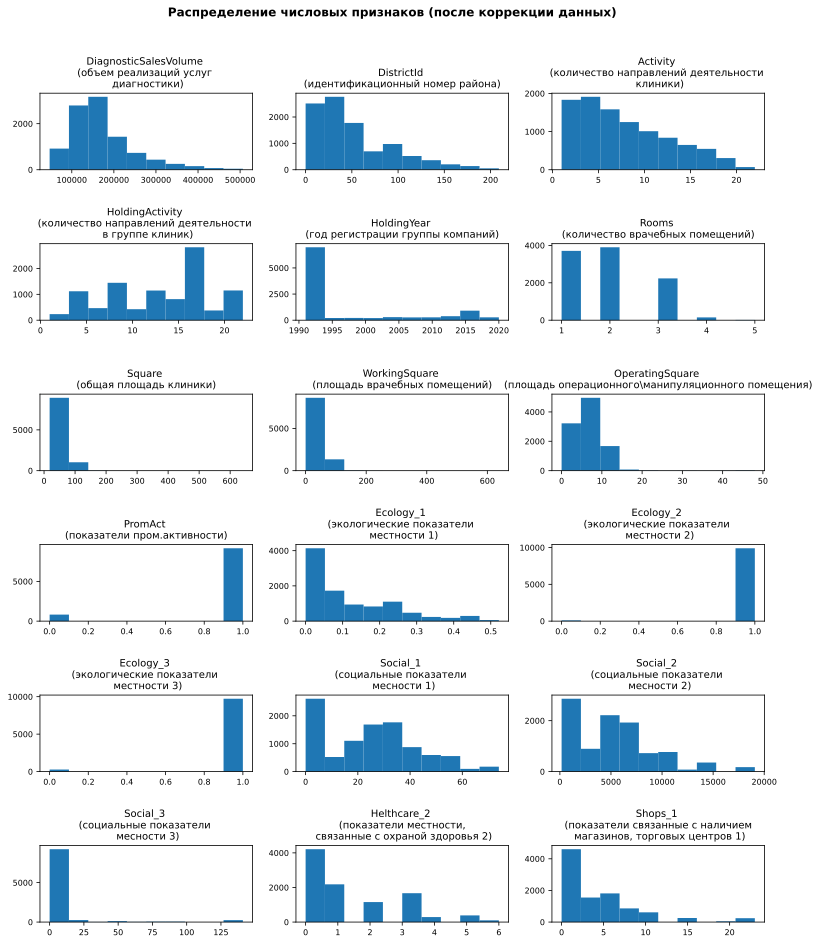

In [78]:
# Разделим числовые и строковые признаки
num_cols, str_cols = numeric_and_string_attributes(train_data)
# Посмотрим визуально на графики числовых переменных
visualization_numerical_characteristics(dop_text='(после коррекции данных)')

## Формирование класса подготовки данных 

In [79]:
class DataPreprocessing():
    
#     Класс 'Подготовки исходных данных'

#      Атрибуты:
#     - operating_square_median: медиана площади операционной,
#     - rooms_median: медиана количества помещений,
#     - holding_year_mode: мода года регистрации клиник.

#      Методы:
#     - numeric_and_string_attributes(self, df): разделяет числовые и строковые признаки,
#     - fit(self, X): сохраняет медианы и моды, для последующего использования,
#     - transform (self, X): чистит наш датафрейм (заполняет пропуски, исправляет неточности).

#      Dunder методы:
#     - __init__(self): конструктор класса,


    def __init__(self):
        # Переменные класса
        self.holding_year_mode = None
        self.operating_square_median = None
        self.rooms_median = None

    @staticmethod
    def numeric_and_string_attributes(self, df):
    
#         Функция разделяет числовые и строковые признаки.
    
#         :param df: исследуемый датафрейм,
#         :return: num_cols - список числовых признаков, str_cols - список строковых признаков.

        # Числовые признаки
        num_cols = []
        # Строковые признаки
        str_cols = []
        
        cols_and_type = df.dtypes.to_dict()
        
        for col in cols_and_type:
            if cols_and_type[col] in ('int64', 'float64'):
                num_cols.append(col)
            else: 
                str_cols.append(col)
    
        return num_cols, str_cols
    
    def fit(self, X):
        
#          Функция сохраняет статистические данные (медиана, мода)

#         :param X: исследуемый датафрейм.

        self.holding_year_mode = X['HoldingYear'].mode()[0]
        self.operating_square_median = X['OperatingSquare'].median()
        self.rooms_median = X['Rooms'].median()
        
    
    def transform (self, X):
        
#         Функция чистит данные.

#         :param X: исследуемый датафрейм,
#         :return: возвращает очищенный датафрейм.

        # Удалияем неинформативные признаки
        X.drop('Healthcare_1', axis=1, inplace=True)
        X.drop('Мarketing_1', axis=1, inplace=True)
        X.drop('Unnamed: 0', axis=1, inplace=True)
        
        # Признак 'HoldingYear'
        # Заменим все года, которые больше текущего года на моду
        X.loc[X['HoldingYear'] > datetime.now().year, ['HoldingYear']] = self.holding_year_mode
        
        # Признак 'Rooms'
        # Заменим аномальные значения 
        index_edit = X.query('(((Rooms >= 5) & (Square < 100)) | (Rooms < 1))').index
        X.loc[index_edit, ['Rooms']] = self.rooms_median

        # Признак 'OperatingSquare'
        # Заменим все операционные, которые больше 48 квадратов на нормативную
        X.loc[X['OperatingSquare'] > 48, ['OperatingSquare']] = 48

        # Признаки 'Square' и 'WorkingSquare'
        # Округлим метраж до целых чисел
        X['Square'] = X['Square'].apply(lambda x: round(x, 0))
        X['WorkingSquare'] = X['WorkingSquare'].apply(lambda x: round(x, 0))
        # 
        # Заменим экстримальные значения WorkingSquare
        X.loc[(X['WorkingSquare'] > X['Square'].max()), ['WorkingSquare']] = X['Square']
        # 
        # Заменим совсем маленькую площадь помещений 
        X.loc[(X['Square'] < 18), ['Square']] = 18
        # 
        # Заменим не корректные значения Square 
        X.loc[(X['Square'] < X['WorkingSquare']), ['Square']] = X['WorkingSquare'] + X['OperatingSquare']
        # 
        # Заменим не корректные значения WorkingSquare 
        X.loc[(X['Square'] == X['WorkingSquare']), ['WorkingSquare']] = X['Square'] - X['OperatingSquare']
        # 
        # Заменим недостающие значения WorkingSquare или значения < 16 
        X.loc[((X['WorkingSquare'].isna()) | (X['WorkingSquare'] < 16)), ['WorkingSquare']] = X['Square'] - X['OperatingSquare']

        # Признаки 'HoldingActivity' и 'Activity'
        # Заменим недостающие значения 
        X.loc[((X['HoldingActivity'].isna()) | (X['HoldingActivity'] < X['Activity'])), ['HoldingActivity']] = X['Activity']
        X.loc[((X['Activity'].isna()) | (X['Activity'] <= 0)), ['Activity']] = X['HoldingActivity']

        # Разделим числовые и строковые признаки
        num_cols, str_cols = self.numeric_and_string_attributes(self, X)

        # Изменим тип признаков
        le = LabelEncoder()
        
        # Преобразуем буквеное обозначение в цифровое
        for col in  str_cols:
            X[col] = le.fit_transform(X[col].astype(str))
        # 
        # Переведём Id клиник в строковый формат
        X['Id'] = X['Id'].astype(str)

        return X

In [80]:
# Проверим правильности созданного класса
train_data_new = pd.read_csv(TRAIN_DATA, engine='python', on_bad_lines='skip')
train_data.head()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
0  14045              147973.54          35         7             9.00   
1  15060              240007.56          41         7             9.00   
2   4772              176740.73          53         8            12.00   
3   5816              140492.98          58         8            17.00   
4  10790              120181.23          99        11            12.00   

   HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare  PromAct  \
0         1991   2.00   48.00          29.00             6.00        1   
1         1991   3.00   66.00          40.00             8.00        1   
2         1991   2.00   45.00          29.00             0.00        1   
3         1991   2.00   53.00          44.00             9.00        1   
4         1991   1.00   40.00          24.00             7.00        1   

   Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Helthcare_2  \
0       0.09          1          1        33      7976         5            0   
1       0.00          1          1        46     10309         1            1   
2       0.05          1          1        34      7759         0            1   
3       0.44          1          1        23      5735         3            0   
4       0.01          1          1        35      5776         1            2   

   Shops_1  
0       11  
1       16  
2        3  
3        5  
4        4

In [81]:
# train_data_new.drop('Unnamed: 0', axis=1, inplace=True)
train_data_new.head()

Unnamed: 0     Id  DiagnosticSalesVolume  DistrictId  Activity  \
0           0  14045              147973.54          35         7   
1           1  15060              240007.56          41         7   
2           2   4772              176740.73          53         8   
3           3   5816              140492.98          58         8   
4           4  10790              120181.23          99        11   

   HoldingActivity  HoldingYear  Rooms  Square  WorkingSquare  ...  PromAct  \
0             9.00         1991   2.00   47.98          29.44  ...        B   
1             9.00         1991   3.00   65.68          40.05  ...        B   
2            12.00         1991   2.00   44.95          29.20  ...        B   
3            17.00         1991   2.00   53.35          52.73  ...        B   
4            12.00         1991   1.00   39.65          23.78  ...        B   

   Ecology_1 Ecology_2  Ecology_3 Social_1 Social_2  Social_3  Healthcare_1  \
0       0.09         B          B       33     7976         5           NaN   
1       0.00         B          B       46    10309         1           NaN   
2       0.05         B          B       34     7759         0           NaN   
3       0.44         B          B       23     5735         3           NaN   
4       0.01         B          B       35     5776         1           NaN   

   Helthcare_2  Shops_1  
0            0       11  
1            1       16  
2            1        3  
3            0        5  
4            2        4  

[5 rows x 22 columns]

In [82]:
# Создадим объект класса
dp = DataPreprocessing()
dp.fit(train_data_new)
# Сохраним очищенный датасет
proverka = dp.transform(train_data_new)
# Сравним датафрейм измененный ранее с изменённым с помощью объекта класса
proverka.equals(train_data)

True

In [83]:
# Истинно при совпадении и правильности создания класса

# # Построение новых признаков 

#### "DistrictSize", "IsDistrictLarge" 
(размеры районов) 

In [84]:
# Распределение номеров районов
district_size = train_data['DistrictId'].value_counts().reset_index()
district_size['DistrictSize'] = district_size['DistrictId']
district_size['DistrictId'] = district_size['index']
district_size = district_size.drop('index', axis=1)
district_size.head()

DistrictId  DistrictSize
0          27           851
1           1           652
2          23           565
3           6           511
4           9           294

In [85]:
train_data.head()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
0  14045              147973.54          35         7             9.00   
1  15060              240007.56          41         7             9.00   
2   4772              176740.73          53         8            12.00   
3   5816              140492.98          58         8            17.00   
4  10790              120181.23          99        11            12.00   

   HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare  PromAct  \
0         1991   2.00   48.00          29.00             6.00        1   
1         1991   3.00   66.00          40.00             8.00        1   
2         1991   2.00   45.00          29.00             0.00        1   
3         1991   2.00   53.00          44.00             9.00        1   
4         1991   1.00   40.00          24.00             7.00        1   

   Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Helthcare_2  \
0       0.09          1          1        33      7976         5            0   
1       0.00          1          1        46     10309         1            1   
2       0.05          1          1        34      7759         0            1   
3       0.44          1          1        23      5735         3            0   
4       0.01          1          1        35      5776         1            2   

   Shops_1  
0       11  
1       16  
2        3  
3        5  
4        4

In [86]:
# Добавим 'DistrictSize' к нашему датафрейму
train_data = train_data.merge(district_size, on='DistrictId', how='left')
train_data.head()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
0  14045              147973.54          35         7             9.00   
1  15060              240007.56          41         7             9.00   
2   4772              176740.73          53         8            12.00   
3   5816              140492.98          58         8            17.00   
4  10790              120181.23          99        11            12.00   

   HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare  PromAct  \
0         1991   2.00   48.00          29.00             6.00        1   
1         1991   3.00   66.00          40.00             8.00        1   
2         1991   2.00   45.00          29.00             0.00        1   
3         1991   2.00   53.00          44.00             9.00        1   
4         1991   1.00   40.00          24.00             7.00        1   

   Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Helthcare_2  \
0       0.09          1          1        33      7976         5            0   
1       0.00          1          1        46     10309         1            1   
2       0.05          1          1        34      7759         0            1   
3       0.44          1          1        23      5735         3            0   
4       0.01          1          1        35      5776         1            2   

   Shops_1  DistrictSize  
0       11            22  
1       16            87  
2        3           174  
3        5           179  
4        4            97

In [87]:
# Распределение 'DistrictSize' 
train_data[train_data['DistrictSize'] > 100]

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
2      4772              176740.73          53         8            12.00   
3      5816              140492.98          58         8            17.00   
7     12000              176995.33          74        14            14.00   
8      5179              183282.24           1         9            17.00   
9      8656               76304.18          23        13            17.00   
13     2415              201985.53          57         6            12.00   
14    10960              112518.05          27         5             5.00   
16     2126               93600.31          27         6             6.00   
17     3007              185462.75          34         6            14.00   
18     2836              146994.58          57         6            12.00   
21    11942              101760.02          27        15            15.00   
25     5080              195316.66          74        16            17.00   
26     4385              269839.89          27        17            17.00   
27     7557              139128.74          23         8            17.00   
28     8061               76270.56          23         3             9.00   
29      529              170699.33          11         4             9.00   
31     4792              151205.79          61        12            16.00   
32    13260              142977.37          27         9            15.00   
33    13912              123943.05          44         7             9.00   
36    11710               82808.18          23         4            17.00   
39     9378              183822.45          23        16            16.00   
42     9840              156863.13           1         9            17.00   
43      182              147600.81          23        16            17.00   
45     7015              147061.05          21         5             5.00   
46     1828               70771.54          23         9            12.00   
48     7603               76823.33          23         3             9.00   
52     2308              159372.36           1        17            20.00   
53     6462              146357.09          44         3            14.00   
54    16341              125181.29           1        14            17.00   
57     3210               72242.93          23         3             3.00   
59    12400              193921.79          11         5            16.00   
61     4198              157875.04           1        10            17.00   
63     7612               90893.78           6         6            12.00   
64     9730              126519.15          52         5            17.00   
65    11405               91250.47          62         6             6.00   
67     8450              144431.12          57         7             7.00   
69     6932              182867.20          27        15            17.00   
70    10369              133619.18          27         9             9.00   
71     2143              194783.90          74        12            17.00   
72    14682              128233.73          74        18            18.00   
74     4021              152610.39           6        17            17.00   
75    12253              157680.84           9        11            16.00   
76    14027              144934.11          34         2             2.00   
84     7495              122430.58          21         2            12.00   
85    11255              191023.56          27         2             9.00   
95     4287              229251.55          34         6             6.00   
96    14326              173879.41          27         2             7.00   
98     9760               88496.50          23        14            17.00   
99    13584              132015.16          61         8             9.00   
100   14763              140151.17           1        10            20.00   
101    3980               73701.65           1        14            14.00   
103  

In [88]:
# Добавим новый признак 'IsDistrictLarge'
train_data['IsDistrictLarge'] = (train_data['DistrictSize'] > 100).astype(int)
train_data.head()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
0  14045              147973.54          35         7             9.00   
1  15060              240007.56          41         7             9.00   
2   4772              176740.73          53         8            12.00   
3   5816              140492.98          58         8            17.00   
4  10790              120181.23          99        11            12.00   

   HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare  ...  Ecology_1  \
0         1991   2.00   48.00          29.00             6.00  ...       0.09   
1         1991   3.00   66.00          40.00             8.00  ...       0.00   
2         1991   2.00   45.00          29.00             0.00  ...       0.05   
3         1991   2.00   53.00          44.00             9.00  ...       0.44   
4         1991   1.00   40.00          24.00             7.00  ...       0.01   

   Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Helthcare_2  Shops_1  \
0          1          1        33      7976         5            0       11   
1          1          1        46     10309         1            1       16   
2          1          1        34      7759         0            1        3   
3          1          1        23      5735         3            0        5   
4          1          1        35      5776         1            2        4   

   DistrictSize  IsDistrictLarge  
0            22                0  
1            87                0  
2           174                1  
3           179                1  
4            97                0  

[5 rows x 21 columns]

#### "MedianSalesDistric" 
(медиана реализаций клиники в зависимости от района и количества врачебных помещений) 

In [89]:
# Средний объем реализаций услуг в зависимости от района и количества врачебных помещений
med_sales_by_district = train_data.groupby(['DistrictId', 'Activity'], as_index=False).agg({'DiagnosticSalesVolume':'median'}).rename(columns={'DiagnosticSalesVolume':'MedianSalesDistric'})  
med_sales_by_district.head()

DistrictId  Activity  MedianSalesDistric
0           0         1           130275.65
1           0         2           131852.82
2           0         3           128970.61
3           0         4           159592.50
4           0         5           129858.23

In [90]:
# Добавляем этот признак в датафрейм
train_data = train_data.merge(med_sales_by_district, on=['DistrictId', 'Activity'], how='left')
train_data.head()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
0  14045              147973.54          35         7             9.00   
1  15060              240007.56          41         7             9.00   
2   4772              176740.73          53         8            12.00   
3   5816              140492.98          58         8            17.00   
4  10790              120181.23          99        11            12.00   

   HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare  ...  Ecology_2  \
0         1991   2.00   48.00          29.00             6.00  ...          1   
1         1991   3.00   66.00          40.00             8.00  ...          1   
2         1991   2.00   45.00          29.00             0.00  ...          1   
3         1991   2.00   53.00          44.00             9.00  ...          1   
4         1991   1.00   40.00          24.00             7.00  ...          1   

   Ecology_3  Social_1  Social_2  Social_3  Helthcare_2  Shops_1  \
0          1        33      7976         5            0       11   
1          1        46     10309         1            1       16   
2          1        34      7759         0            1        3   
3          1        23      5735         3            0        5   
4          1        35      5776         1            2        4   

   DistrictSize  IsDistrictLarge  MedianSalesDistric  
0            22                0           155340.32  
1            87                0           176551.04  
2           174                1           192049.79  
3           179                1           134469.04  
4            97                0           151364.99  

[5 rows x 22 columns]

#### "MedSalesByActivityYear", 'Activity_cat', 'Year_cat' 



In [91]:
def activity_to_cat(X):
    
#     Функция разбивает направления деятельности на категории в зависимости от направлений деятельности группы.

#     :param X: исследуемый датафрейм,
#     :return: датафрейм с признаком категории направлений деятельности.

    # Этот код анологичен встроенной функии Pandas pd.cut
    bins = [0, 3, 5, 9, 15, X['Activity'].max()]
    X['Activity_cat'] = pd.cut(X['Activity'], bins=bins, labels=False)
    X['Activity_cat'].fillna(-1, inplace=True)
    
    return X

In [92]:
def year_to_cat(X):

#     Функция разбивает направления деятельности на категории в зависимости от года регистрации группы клиник.

#     :param X: исследуемый датафрейм,
#     :return: датафрейм с признаком категории регистрации группы клиник.

    # Этот код анологичен встроенной функии Pandas pd.cut
   
    bins = [0, 1991, 1998, 2005, 2012, 2019, X['HoldingYear'].max()]
    X['Year_cat'] = pd.cut(X['HoldingYear'], bins=bins, labels=False)
    X['Year_cat'].fillna(-1, inplace=True)

    return X

In [93]:
# Создадим дополнительные признаки
train_data = year_to_cat(train_data)
train_data = activity_to_cat(train_data)
train_data.head()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
0  14045              147973.54          35         7             9.00   
1  15060              240007.56          41         7             9.00   
2   4772              176740.73          53         8            12.00   
3   5816              140492.98          58         8            17.00   
4  10790              120181.23          99        11            12.00   

   HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare  ...  Social_1  \
0         1991   2.00   48.00          29.00             6.00  ...        33   
1         1991   3.00   66.00          40.00             8.00  ...        46   
2         1991   2.00   45.00          29.00             0.00  ...        34   
3         1991   2.00   53.00          44.00             9.00  ...        23   
4         1991   1.00   40.00          24.00             7.00  ...        35   

   Social_2  Social_3  Helthcare_2  Shops_1  DistrictSize  IsDistrictLarge  \
0      7976         5            0       11            22                0   
1     10309         1            1       16            87                0   
2      7759         0            1        3           174                1   
3      5735         3            0        5           179                1   
4      5776         1            2        4            97                0   

   MedianSalesDistric  Year_cat  Activity_cat  
0           155340.32         0             2  
1           176551.04         0             2  
2           192049.79         0             2  
3           134469.04         0             2  
4           151364.99         0             3  

[5 rows x 24 columns]

In [94]:
# Рассчитаем среднюю реализацию по направлениям деятельности и по году регистрации группы
med_sales_by_activity_year = train_data.groupby(['Year_cat', 'Activity_cat'], as_index=False).agg({'DiagnosticSalesVolume':'mean'}).rename(columns={'DiagnosticSalesVolume':'MedSalesByActivityYear'})
med_sales_by_activity_year.head()

Year_cat  Activity_cat  MedSalesByActivityYear
0         0             0               156601.47
1         0             1               164638.93
2         0             2               169347.82
3         0             3               167234.92
4         0             4               166689.01

In [95]:
# Добавим новый признак MedSalesByActivityYe 
# средняя реализация клиники в зависимости от направлений деятельности и года регистрации группы
train_data = train_data.merge(med_sales_by_activity_year, on=['Year_cat','Activity_cat'], how='left')
train_data.head()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
0  14045              147973.54          35         7             9.00   
1  15060              240007.56          41         7             9.00   
2   4772              176740.73          53         8            12.00   
3   5816              140492.98          58         8            17.00   
4  10790              120181.23          99        11            12.00   

   HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare  ...  Social_2  \
0         1991   2.00   48.00          29.00             6.00  ...      7976   
1         1991   3.00   66.00          40.00             8.00  ...     10309   
2         1991   2.00   45.00          29.00             0.00  ...      7759   
3         1991   2.00   53.00          44.00             9.00  ...      5735   
4         1991   1.00   40.00          24.00             7.00  ...      5776   

   Social_3  Helthcare_2  Shops_1  DistrictSize  IsDistrictLarge  \
0         5            0       11            22                0   
1         1            1       16            87                0   
2         0            1        3           174                1   
3         3            0        5           179                1   
4         1            2        4            97                0   

   MedianSalesDistric  Year_cat  Activity_cat  MedSalesByActivityYear  
0           155340.32         0             2               169347.82  
1           176551.04         0             2               169347.82  
2           192049.79         0             2               169347.82  
3           134469.04         0             2               169347.82  
4           151364.99         0             3               167234.92  

[5 rows x 25 columns]

## Создание класса новых признаков

In [96]:
class FeatureGenerator():
    
#     Класс 'Генерации новых фич'

#      Атрибуты:
#     - holdingactivity_year_max: максимальный год регистрации группы клиник
#     - activity_max: максимальное число направлений деятельности клиники
#     - med_sales_by_district: средняя реализация клиники в зависимости от района и врачебный помещений
#     - med_sales_by_activity_year: средняя реализация по направлениям деятельности клиники и по году регистрации 
#                                   группы клиник.

#      Методы:
#     - fit(self, X): сохраняет макс. значения и другие параметры, для последующего использования,
#     - transform (self, X): добавляет новые фичи в датафрейм.

#      Dunder методы:
#     - __init__(self): конструктор класса,

    def __init__(self):
        # Переменные лласса
        self.holdingyear_year_max = None
        self.activity_max = None
        self.med_sales_by_district = None
        self.med_sales_by_activity_year = None
         
    def fit(self, X):
        
#         Функция сохраняет необходимые данные.

#         :param X: исследуемый датафрейм.
      
        self.holdingyear_year_max = X['HoldingYear'].max()
        self.activity_max = X['Activity'].max()
         
    def transform (self, X):
        
#         Функция добавляет новые фичи.

#         :param X: исследуемый датафрейм,
#         :return: возвращает датафрейм с новыми фичами.
       
        x = X.copy()

        #  Добавим 'DistrictSize' распределение номеровjрайонов
        district_size = x['DistrictId'].value_counts().reset_index()
        district_size['DistrictSize'] = district_size['DistrictId']
        district_size['DistrictId'] = district_size['index']
        district_size = district_size.drop('index', axis=1)    
        x = x.merge(district_size, on='DistrictId', how='left')
        
        # Добавим новый признак 'IsDistrictLarge'
        x['IsDistrictLarge'] = (x['DistrictSize'] > 100).astype(int)
        
        if self.med_sales_by_district is None:
            # Средний объем реализаций клиникой услуг в зависимости от района и количества помещений
            self.med_sales_by_district = x.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'DiagnosticSalesVolume':'median'}).rename(columns={'DiagnosticSalesVolume':'MedSalesByDistrict'})  
        # Добавляем этот признак в датафрейм
        x = x.merge(self.med_sales_by_district, on=['DistrictId', 'Rooms'], how='left')

        # Категории регистрации группы клиник (год)
        bins = [0, 1991, 1998, 2005, 2012, 2019, self.holdingyear_year_max]
        x['Year_cat'] = pd.cut(x['HoldingYear'], bins=bins, labels=False)
        x['Year_cat'].fillna(-1, inplace=True)

        # На сколько категорий будем делить направления деятельности: 0-3, 3-5, 5-9, 15-max
        bins = [0, 3, 5, 9, 15, self.activity_max]
        x['Activity_cat'] = pd.cut(x['Activity'], bins=bins, labels=False)
        x['Activity_cat'].fillna(-1, inplace=True)

        if self.med_sales_by_activity_year is None:
            # Рассчитаем среднюю реализацию по направлениям деятельности и по году регистрации группы
            self.med_sales_by_activity_year = x.groupby(['Year_cat', 'Activity_cat'], as_index=False).agg({'DiagnosticSalesVolume':'mean'}).rename(columns={'DiagnosticSalesVolume':'MedPSalesByActivityYear'})
        # Добавим новый признак в датафрейм
        x = x.merge(self.med_sales_by_activity_year, on=['Year_cat','Activity_cat'], how='left')
        
        return x

In [97]:

train_data.head()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
0  14045              147973.54          35         7             9.00   
1  15060              240007.56          41         7             9.00   
2   4772              176740.73          53         8            12.00   
3   5816              140492.98          58         8            17.00   
4  10790              120181.23          99        11            12.00   

   HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare  ...  Social_2  \
0         1991   2.00   48.00          29.00             6.00  ...      7976   
1         1991   3.00   66.00          40.00             8.00  ...     10309   
2         1991   2.00   45.00          29.00             0.00  ...      7759   
3         1991   2.00   53.00          44.00             9.00  ...      5735   
4         1991   1.00   40.00          24.00             7.00  ...      5776   

   Social_3  Helthcare_2  Shops_1  DistrictSize  IsDistrictLarge  \
0         5            0       11            22                0   
1         1            1       16            87                0   
2         0            1        3           174                1   
3         3            0        5           179                1   
4         1            2        4            97                0   

   MedianSalesDistric  Year_cat  Activity_cat  MedSalesByActivityYear  
0           155340.32         0             2               169347.82  
1           176551.04         0             2               169347.82  
2           192049.79         0             2               169347.82  
3           134469.04         0             2               169347.82  
4           151364.99         0             3               167234.92  

[5 rows x 25 columns]

In [98]:
# Проверка правильности создания на тренировочных данных
train_data_new = pd.read_csv(TRAIN_DATA, engine='python', on_bad_lines='skip')

In [99]:
# Создание объекта класса и стат данных
dp = DataPreprocessing()
dp.fit(train_data_new)
proverka = dp.transform(train_data_new)

# Создание объекта класса и стат данных с доп фичами
fg = FeatureGenerator()
fg.fit(proverka)
proverka = fg.transform(proverka)

## Создание модели

#### Проверка модели без генерации новых фич 

In [100]:
# Тренировочные данные
train_data = pd.read_csv(TRAIN_DATA, engine='python', on_bad_lines='skip')
# Тестовые данные
test_data = pd.read_csv(TEST_DATA, engine='python', on_bad_lines='skip')

# Создадим объект класса
dp = DataPreprocessing()
dp.fit(train_data)
# Сохраним очищенный датасет (train)
X = dp.transform(train_data)
# Сохраним очищенный датасет (test)
test_data = dp.transform(test_data)

# Создадим целевую переменную (реализации)
y = X['DiagnosticSalesVolume']
# Удалим реализации из тренировочных данных
X_not_price = X.drop('DiagnosticSalesVolume', axis=1)

In [101]:
# Разобьём выборку на тренировочную (70%) и валидную (30%)
X_train, X_valid, y_train, y_valid = train_test_split(X_not_price, y, test_size=0.3, random_state=42)

In [102]:
# Размерность датафремов
(X_train.shape, X_valid.shape, test_data.shape)

((7000, 18), (3000, 18), (5000, 18))

In [103]:
# Создадим модель с количеством 2000, с максимальной глубиной 21
rf_model = RandomForestRegressor(n_estimators=2000, max_depth=21, random_state=42, criterion='squared_error')

In [104]:
%%time
# Обучим модель
rf_model.fit(X_train, y_train) 

CPU times: user 1min, sys: 490 ms, total: 1min
Wall time: 1min


RandomForestRegressor(max_depth=21, n_estimators=2000, random_state=42)

In [105]:
%%time
# Выполним обучение модели с кросс-валидацией
cv = cross_validate(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True))

CPU times: user 2min 4s, sys: 1.38 s, total: 2min 5s
Wall time: 2min 7s


In [106]:
# Средняя эффективность по метрике r2
print(f'Средняя эффективность по метрике r2:')
# ' {cv['test_score'].mean()}')
print(cv['test_score'].mean())

Средняя эффективность по метрике r2:
0.7159338617477617


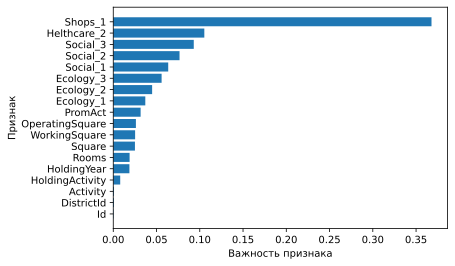

In [107]:
# Задаем размер фигуры
plt.rcParams['figure.figsize'] = 6, 4
# Задаём данные для отрисовки
plt.barh(X_train.keys().tolist(), np.sort(rf_model.feature_importances_))
# Подписываем оси
plt.xlabel("Важность признака")
plt.ylabel("Признак")

plt.show()

In [108]:
# Оценим точность модели на данных, которые она не видела (X_valid, y_valid)

In [109]:
# Выполним предикт и посмотрим эффективность модели по метрике r2
y_pred = rf_model.predict(X_valid)
print(f'Эффективность модели по метрике r2: {r2_score(y_valid, y_pred)}')

Эффективность модели по метрике r2: 0.7105156860946553


#### Проверка модели с генерацией новых фич 

In [110]:
# Создадим объект класса
fg = FeatureGenerator()
fg.fit(X)

In [111]:
# Сгенерим дополнительные фичи (train)
X_new_features = fg.transform(X)
X_new_features.head()

Id  DiagnosticSalesVolume  DistrictId  Activity  HoldingActivity  \
0  14045              147973.54          35         7             9.00   
1  15060              240007.56          41         7             9.00   
2   4772              176740.73          53         8            12.00   
3   5816              140492.98          58         8            17.00   
4  10790              120181.23          99        11            12.00   

   HoldingYear  Rooms  Square  WorkingSquare  OperatingSquare  ...  Social_2  \
0         1991   2.00   48.00          29.00             6.00  ...      7976   
1         1991   3.00   66.00          40.00             8.00  ...     10309   
2         1991   2.00   45.00          29.00             0.00  ...      7759   
3         1991   2.00   53.00          44.00             9.00  ...      5735   
4         1991   1.00   40.00          24.00             7.00  ...      5776   

   Social_3  Helthcare_2  Shops_1  DistrictSize  IsDistrictLarge  \
0         5            0       11            22                0   
1         1            1       16            87                0   
2         0            1        3           174                1   
3         3            0        5           179                1   
4         1            2        4            97                0   

   MedSalesByDistrict  Year_cat  Activity_cat  MedPSalesByActivityYear  
0           166228.91         0             2                169347.82  
1           240007.56         0             2                169347.82  
2           210208.53         0             2                169347.82  
3           133447.73         0             2                169347.82  
4           126831.24         0             3                167234.92  

[5 rows x 25 columns]

In [112]:
# Удалим реализации из тренировочных данных
X_new_features = X_new_features.drop('DiagnosticSalesVolume', axis=1)
X_new_features.head()

Id  DistrictId  Activity  HoldingActivity  HoldingYear  Rooms  Square  \
0  14045          35         7             9.00         1991   2.00   48.00   
1  15060          41         7             9.00         1991   3.00   66.00   
2   4772          53         8            12.00         1991   2.00   45.00   
3   5816          58         8            17.00         1991   2.00   53.00   
4  10790          99        11            12.00         1991   1.00   40.00   

   WorkingSquare  OperatingSquare  PromAct  ...  Social_2  Social_3  \
0          29.00             6.00        1  ...      7976         5   
1          40.00             8.00        1  ...     10309         1   
2          29.00             0.00        1  ...      7759         0   
3          44.00             9.00        1  ...      5735         3   
4          24.00             7.00        1  ...      5776         1   

   Helthcare_2  Shops_1  DistrictSize  IsDistrictLarge  MedSalesByDistrict  \
0            0       11            22                0           166228.91   
1            1       16            87                0           240007.56   
2            1        3           174                1           210208.53   
3            0        5           179                1           133447.73   
4            2        4            97                0           126831.24   

   Year_cat  Activity_cat  MedPSalesByActivityYear  
0         0             2                169347.82  
1         0             2                169347.82  
2         0             2                169347.82  
3         0             2                169347.82  
4         0             3                167234.92  

[5 rows x 24 columns]

In [113]:
# Сгенерим дополнительные фичи (test)
test_data = fg.transform(test_data)
X_new_features.head()

Id  DistrictId  Activity  HoldingActivity  HoldingYear  Rooms  Square  \
0  14045          35         7             9.00         1991   2.00   48.00   
1  15060          41         7             9.00         1991   3.00   66.00   
2   4772          53         8            12.00         1991   2.00   45.00   
3   5816          58         8            17.00         1991   2.00   53.00   
4  10790          99        11            12.00         1991   1.00   40.00   

   WorkingSquare  OperatingSquare  PromAct  ...  Social_2  Social_3  \
0          29.00             6.00        1  ...      7976         5   
1          40.00             8.00        1  ...     10309         1   
2          29.00             0.00        1  ...      7759         0   
3          44.00             9.00        1  ...      5735         3   
4          24.00             7.00        1  ...      5776         1   

   Helthcare_2  Shops_1  DistrictSize  IsDistrictLarge  MedSalesByDistrict  \
0            0       11            22                0           166228.91   
1            1       16            87                0           240007.56   
2            1        3           174                1           210208.53   
3            0        5           179                1           133447.73   
4            2        4            97                0           126831.24   

   Year_cat  Activity_cat  MedPSalesByActivityYear  
0         0             2                169347.82  
1         0             2                169347.82  
2         0             2                169347.82  
3         0             2                169347.82  
4         0             3                167234.92  

[5 rows x 24 columns]

In [114]:
# Разобьём выборку на тренировочную (70%) и валидную (30%)
X_train, X_valid, y_train, y_valid = train_test_split(X_new_features, y, test_size=0.3, random_state=42)

In [115]:
# Размерность датафремов
(X_train.shape, X_valid.shape, test_data.shape)

((7000, 24), (3000, 24), (5000, 24))

In [116]:
# Создадим модель с количеством  2000, с максимальной глубиной 21 
rf_model_new_features = RandomForestRegressor(n_estimators=2000, max_depth=21, random_state=42, criterion='squared_error')

In [117]:
%%time
# Обучим модель
rf_model_new_features.fit(X_train, y_train)

CPU times: user 1min 18s, sys: 493 ms, total: 1min 19s
Wall time: 1min 19s


RandomForestRegressor(max_depth=21, n_estimators=2000, random_state=42)

In [118]:
%%time
# Выполним обучение модели с кросс-валидацией
cv = cross_validate(rf_model_new_features, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True))

CPU times: user 2min 40s, sys: 1.36 s, total: 2min 41s
Wall time: 2min 42s


In [119]:
# Средняя эффективность по метрике r2
print("Средняя эффективность по метрике r2:")
print(cv['test_score'].mean())

Средняя эффективность по метрике r2:
0.7435727033448791


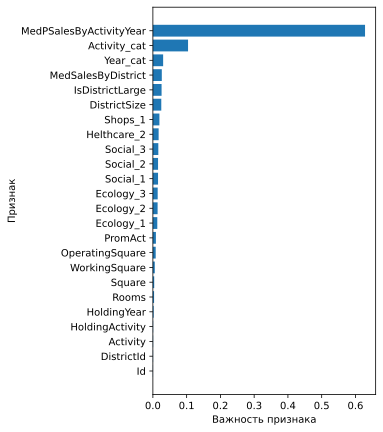

In [120]:
# Задаем размер фигуры
plt.rcParams['figure.figsize'] = 4, 7
# Задаём данные для отрисовки
plt.barh(X_train.keys().tolist(), np.sort(rf_model_new_features.feature_importances_))
# Подписываем оси
plt.xlabel("Важность признака")
plt.ylabel("Признак")

plt.show()

In [121]:
# Оценим точность модели на данных, которые она не видела (X_valid, y_valid)

In [122]:
# Выполним предикт и посмотрим эффективность модели по метрике r2
y_pred = rf_model_new_features.predict(X_valid)
print(f'Эффективность модели по метрике r2: {r2_score(y_valid, y_pred)}')

Эффективность модели по метрике r2: 0.7380251183767266


# Оценка качества

## Прогнозирование на тестовом датасете 

In [123]:
test_data.head()

Id  DistrictId  Activity  HoldingActivity  HoldingYear  Rooms  Square  \
0    732          58         6            14.00         1972   2.00   50.00   
1  15863          74         6             6.00         1977   2.00   69.00   
2   5487         190         2             5.00         1909   1.00   18.00   
3  15671          47         2            22.00         2007   2.00   73.00   
4  14282          27        17            17.00         2017   1.00   48.00   

   WorkingSquare  OperatingSquare  PromAct  ...  Social_2  Social_3  \
0          33.00             6.00        1  ...      2748         1   
1          68.00             1.00        1  ...      1437         3   
2          16.00            12.00        1  ...      7538        87   
3          52.00             9.00        1  ...      4583         3   
4          43.00             1.00        0  ...       629         1   

   Helthcare_2  Shops_1  DistrictSize  IsDistrictLarge  MedSalesByDistrict  \
0            0        0            91                0           133447.73   
1            0        2            61                0           194425.36   
2            5        5             2                0                 NaN   
3            3        3            49                0           177782.07   
4            0        0           391                1            94661.67   

   Year_cat  Activity_cat  MedPSalesByActivityYear  
0         0          2.00                169347.82  
1         0          2.00                169347.82  
2         0          0.00                156601.47  
3         3          0.00                203974.27  
4         4          4.00                172180.54  

[5 rows x 24 columns]

In [124]:
# Посмотрим размерность датасета
test_data.shape

(5000, 24)

In [125]:
test_data = test_data.fillna(0)

In [126]:
# Выполняем предикт
predictions = rf_model_new_features.predict(test_data)
predictions

array([130424.07916774, 196382.51722034, 102474.70357021, ...,
       236312.93137676, 157288.81704997, 145284.42241667])

In [134]:
# Запишем в датасет Id и реализации клиник
df_predict = pd.DataFrame()
df_predict['Id'] = test_data['Id']
df_predict['DiagnosticSalesVolume'] = predictions

## Оценка точности прогнозов (построенных на основе полученной модели)

In [135]:
# Получение данных для сравнения точности
df_test = pd.read_csv(TEST_DATA_SALES, engine='python', on_bad_lines='skip')

In [136]:
df_predict['DiagnosticSalesVolume_test'] = df_test['DiagnosticSalesVolume_test']
df_predict['DiagnosticSalesVolume_test'] = df_test['DiagnosticSalesVolume_test']
df_predict['Disaccord'] =  df_predict['DiagnosticSalesVolume_test'] - df_predict['DiagnosticSalesVolume']
df_predict['DisaccordPercent'] =  df_predict['Disaccord'] / df_predict['DiagnosticSalesVolume']
df_predict.head()

Id  DiagnosticSalesVolume  DiagnosticSalesVolume_test  Disaccord  \
0    732              130424.08                   133691.08    3267.00   
1  15863              196382.52                   203587.52    7205.00   
2   5487              102474.70                   103323.70     849.00   
3  15671              247018.28                   248526.28    1508.00   
4  14282              116809.69                   122690.69    5881.00   

   DisaccordPercent  
0              0.03  
1              0.04  
2              0.01  
3              0.01  
4              0.05

In [ ]:
# DiagnosticSalesVolume - данные расчитанные на основе модели
# DiagnosticSalesVolume_test - данные полученные от организации для сравнения точности
# Disaccord - ошибка прогноза на основе полученной модели
# DisaccordPercent - относительная ошибка прогноза
# DisaccordPercentMean - средняя ошибка прогноза
# DisaccordPercentMax - максимальная ошибка прогноза

In [137]:
# Средняя ошибка прогноза
DisaccordPercentMean = df_predict['DisaccordPercent'].mean()
DisaccordPercentMean

0.03256898271383759

In [138]:
# Максимальная ошибка прогноза
DisaccordPercentMax = df_predict['DisaccordPercent'].max()
DisaccordPercentMax

0.17519470321418246

In [139]:
df_predict

Id  DiagnosticSalesVolume  DiagnosticSalesVolume_test  Disaccord  \
0       732              130424.08                   133691.08    3267.00   
1     15863              196382.52                   203587.52    7205.00   
2      5487              102474.70                   103323.70     849.00   
3     15671              247018.28                   248526.28    1508.00   
4     14282              116809.69                   122690.69    5881.00   
5      7640              161459.33                   171312.33    9853.00   
6     13336              134172.10                   139706.10    5534.00   
7      5509              183399.95                   187247.95    3848.00   
8      4227              237309.01                   245802.01    8493.00   
9     11545              171768.13                   175947.13    4179.00   
10    15982              212112.29                   217134.29    5022.00   
11     3317              172481.99                   180154.99    7673.00   
12     9293              117911.85                   120318.85    2407.00   
13    11267              145731.28                   149951.28    4220.00   
14     5221               84523.90                    91356.90    6833.00   
15    11314              147478.73                   150078.73    2600.00   
16    13550              303342.00                   311269.00    7927.00   
17      622              151710.84                   153964.84    2254.00   
18     3502              170533.72                   172267.72    1734.00   
19     2328              206706.43                   214958.43    8252.00   
20    12053              153204.79                   157257.79    4053.00   
21    16695              118528.58                   126968.58    8440.00   
22    12701              181873.47                   189766.47    7893.00   
23      790              126979.61                   129859.61    2880.00   
24     8975              132056.43                   132883.43     827.00   
25    13461              148193.47                   149382.47    1189.00   
26    12197              200669.44                   208335.44    7666.00   
27    11167               86630.61                    92013.61    5383.00   
28    10298              150394.92                   159128.92    8734.00   
29      898              225860.96                   229163.96    3303.00   
30     2989              141569.86                   146797.86    5228.00   
31     3825              214385.82                   217262.82    2877.00   
32     2456              147900.50                   152976.50    5076.00   
33     8324              129215.07                   136447.07    7232.00   
34     4929              140359.95                   147093.95    6734.00   
35     1264              184617.74                   191176.74    6559.00   
36     9355              155920.70                   165609.70    9689.00   
37     4183              140447.40                   142131.40    1684.00   
38    10711              133914.12                   134910.12     996.00   
39     6631               91250.59                    94019.59    2769.00   
40     5435              134228.68                   136312.68    2084.00   
41    12756              126811.01                   133059.01    6248.00   
42     9001              164088.25                   169586.25    5498.00   
43    11520              117682.45                   124266.45    6584.00   
44     3054              161235.29                   164803.29    3568.00   
45     9526              169909.55                   169994.55      85.00   
46    12316              176342.76                   183564.76    7222.00   
47    14088              194322.49                   203372.49    9050.00   
48     8341              203275.55                   204732.55    1457.00   
49     6350              149485.37                   155654.37    6169.00   
50    14795              106000.87                   108892.87    2892.00   
51   

## Внедрение модели, формирование клиентской базы

In [150]:
# Добавим новый признак 'Сlient'
MinSales = 400000
df_predict['Сlient'] = (df_predict['DiagnosticSalesVolume'] > MinSales).astype(int)
df_predict[df_predict['DiagnosticSalesVolume'] > MinSales]

Id  DiagnosticSalesVolume  DiagnosticSalesVolume_test  Disaccord  \
126   12595              434199.18                   435014.18     815.00   
317    8991              436305.99                   440805.99    4500.00   
563    8196              431667.20                   438209.20    6542.00   
569   12600              410442.88                   419987.88    9545.00   
676    6944              423607.40                   431665.40    8058.00   
720   11417              410066.90                   412645.90    2579.00   
836    9508              433816.10                   437340.10    3524.00   
1017  10962              408910.61                   412065.61    3155.00   
1040  13569              406195.33                   411591.33    5396.00   
1197   8551              405778.44                   415032.44    9254.00   
1499   7776              429536.96                   430085.96     549.00   
1675   3155              407901.88                   411985.88    4084.00   
1692  11507              451734.55                   452086.55     352.00   
1816   3676              414949.53                   424569.53    9620.00   
1853  12966              409653.57                   412150.57    2497.00   
2115   2205              469726.72                   478283.72    8557.00   
2557  16060              414928.09                   415527.09     599.00   
2594   1513              404248.19                   407444.19    3196.00   
2881   8704              429542.68                   436990.68    7448.00   
3083   7875              403906.48                   410702.48    6796.00   
3193   7559              405457.54                   410169.54    4712.00   
3554  13256              409898.43                   419037.43    9139.00   
4106  13416              406658.62                   411892.62    5234.00   
4348  13666              412067.95                   419655.95    7588.00   
4449   9527              410946.03                   419468.03    8522.00   
4975   5353              404924.42                   406572.42    1648.00   

      DisaccordPercent  Сlient  
126               0.00       1  
317               0.01       1  
563               0.02       1  
569               0.02       1  
676               0.02       1  
720               0.01       1  
836               0.01       1  
1017              0.01       1  
1040              0.01       1  
1197              0.02       1  
1499              0.00       1  
1675              0.01       1  
1692              0.00       1  
1816              0.02       1  
1853              0.01       1  
2115              0.02       1  
2557              0.00       1  
2594              0.01       1  
2881              0.02       1  
3083              0.02       1  
3193              0.01       1  
3554              0.02       1  
4106              0.01       1  
4348              0.02       1  
4449              0.02       1  
4975              0.00       1

# Выводы